# 0. IMPORTING FILES AND JOIN THEM

In [588]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def joinFiles(files, rowsDelete, outputFile, colDrop):
    dataframes = []

    for file in files:
        # Read the file, skipping the first 24 lines (0-index) and specifying the separator as tab
        df = pd.read_csv(file, sep='\t', header=rowsDelete)
            
        # Drop columns: leave Station, Lat, Long, Elevation, Date/Time, and (TT or Preassure or WEtDays or Precipitation)
        df.drop(df.columns[colDrop], axis=1, inplace=True)
        dataframes.append(df)

    # Combine all dataframes into one
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

def print_df(df,df_name,df2, df2_name):
    print(f'Name of DataFrame: {df_name}')
    print(f'number of rows = {len(df)}')
    compare_num_rows(df, df_name, df2, df2_name)
    display(df.head())
    
def compare_num_rows(df1, df1_name, df2, df2_name):
    num_rows_df1 = len(df1)
    num_rows_df2 = len(df2)
    
    if num_rows_df1 == num_rows_df2:
        print(f'Both {df1_name} and {df2_name} dataframes have the same number of rows = {num_rows_df1}')
    else:
        more_rows_df_name = df1_name if num_rows_df1 > num_rows_df2 else df2_name
        less_rows_df_name = df2_name if num_rows_df1 > num_rows_df2 else df1_name
        difference = abs(num_rows_df1 - num_rows_df2)
        print(f"{more_rows_df_name} has more rows than {less_rows_df_name} by {difference} rows.")
        

def format_duration(td):
    # Formatting for durations less than a day
    minutes, seconds = divmod(td.seconds, 60)
    hours, minutes = divmod(minutes, 60)
    if hours > 0:
        return f"{hours}h {minutes}min"
    else:
        return f"{minutes}min {seconds}s"

def print_current_time(i, l, start_time, last_step_time):
    current_time = datetime.now()
    # Cumulative time
    cumulative_time = current_time - start_time
    # Time for the current step
    step_time = current_time - last_step_time
    
    # Formatting times
    formatted_cumulative_time = format_duration(cumulative_time)  # Format to hours and minutes
    formatted_step_time = format_duration(step_time)  # Format to minutes and seconds
    
    print(f'i= {i} / {l} : Step Time = {formatted_step_time}, Cumulative Time = {formatted_cumulative_time}')

In [96]:
# List of .tab files to merge
files = ['Lundstad-etal_2022_NR1.tab', 'Lundstad-etal_2022_NR2.tab', 
         'Lundstad-etal_2022_NR3.tab', 'Lundstad-etal_2022_NR4.tab']
df_NR = joinFiles(files,23, 'NR.csv', [0,5,6,9])

files = ['Lundstad-etal_2022_RR1.tab', 'Lundstad-etal_2022_RR2.tab', 
         'Lundstad-etal_2022_RR3.tab', 'Lundstad-etal_2022_RR4.tab',
         'Lundstad-etal_2022_RR5.tab', 'Lundstad-etal_2022_RR6.tab', 
         'Lundstad-etal_2022_RR7.tab', 'Lundstad-etal_2022_RR8.tab']
df_RR = joinFiles(files,23, 'RR.csv', [0,5,6,9])

files = ['Lundstad-etal_2022_Ta1.tab', 'Lundstad-etal_2022_Ta2.tab', 
         'Lundstad-etal_2022_Ta3.tab', 'Lundstad-etal_2022_Ta4.tab',
         'Lundstad-etal_2022_Ta5.tab', 'Lundstad-etal_2022_Ta6.tab', 
         'Lundstad-etal_2022_Ta7.tab']
df_Ta = joinFiles(files, 23,'Ta.csv', [0,5,6,9])

files = ['Lundstad-etal_2022_pressure.tab']
df_P = joinFiles(files,25, 'P.csv', [0,5,6,10])

print_df(df_RR,'df_RR',df_RR,'df_RR')
print_df(df_NR,'df_NR',df_NR,'df_NR')
print_df(df_Ta,'df_Ta',df_Ta,'df_Ta')
print_df(df_P,'df_P',df_P,'df_P')

C:\Users\rodri\AppData\Local\Temp\ipykernel_28664\1291605194.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', header=rowsDelete)
C:\Users\rodri\AppData\Local\Temp\ipykernel_28664\1291605194.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', header=rowsDelete)


Name of DataFrame: df_RR
number of rows = 5401195
Both df_RR and df_RR dataframes have the same number of rows = 5401195


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Precip [mm/month]
0,Lisbon,38.72,-9.17,85.0,1783-01,118.4
1,Lisbon,38.72,-9.17,85.0,1783-02,56.4
2,Lisbon,38.72,-9.17,85.0,1783-03,104.9
3,Lisbon,38.72,-9.17,85.0,1783-04,19.2
4,Lisbon,38.72,-9.17,85.0,1783-05,47.4


Name of DataFrame: df_NR
number of rows = 2588788
Both df_NR and df_NR dataframes have the same number of rows = 2588788


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Wet days [days/month]
0,Lisbon,38.72,-9.17,85.0,1815-12,11.0
1,Lisbon,38.72,-9.17,85.0,1816-01,14.0
2,Lisbon,38.72,-9.17,85.0,1816-02,9.0
3,Lisbon,38.72,-9.17,85.0,1816-03,5.0
4,Lisbon,38.72,-9.17,85.0,1816-04,18.0


Name of DataFrame: df_Ta
number of rows = 4045633
Both df_Ta and df_Ta dataframes have the same number of rows = 4045633


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,TTT monthly m [°C]
0,QuebecCity,46.815,-71.21,33.0,1742-12,-7.5
1,QuebecCity,46.815,-71.21,33.0,1743-01,-10.4
2,QuebecCity,46.815,-71.21,33.0,1743-02,-12.1
3,QuebecCity,46.815,-71.21,33.0,1743-03,-2.9
4,QuebecCity,46.815,-71.21,33.0,1743-04,1.4


Name of DataFrame: df_P
number of rows = 404605
Both df_P and df_P dataframes have the same number of rows = 404605


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PoPoPoPo month m [hPa],PPPP month m [hPa]
0,QuebecCity,46.815,-71.211,32.0,1803-01,NaN,999.2
1,QuebecCity,46.815,-71.211,32.0,1803-02,NaN,1006.5
2,QuebecCity,46.815,-71.211,32.0,1803-03,NaN,1004.6
3,QuebecCity,46.815,-71.211,32.0,1803-04,NaN,1005.3
4,QuebecCity,46.815,-71.211,32.0,1803-05,NaN,1004.1


## 0.1. Solving issues with Preassure files

In [589]:
nan_rows = df_P[(df_P['PoPoPoPo month m [hPa]'].isna()) & (df_P['PPPP month m [hPa]'].isna())]
print(f'number of rows that has NaN values for both \
"PPPP month m [hPa]" and "PoPoPoPo month m [hPa]" = {len(nan_rows)}')
nan_rows.head()

number of rows that has NaN values for both "PPPP month m [hPa]" and "PoPoPoPo month m [hPa]" = 5438


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PoPoPoPo month m [hPa],PPPP month m [hPa]
250666,NAGASAKI,32.78,129.87,NaN,1826-01,NaN,NaN
250667,NAGASAKI,32.78,129.87,NaN,1826-02,NaN,NaN
250668,NAGASAKI,32.78,129.87,NaN,1826-03,NaN,NaN
250669,NAGASAKI,32.78,129.87,NaN,1826-04,NaN,NaN
250670,NAGASAKI,32.78,129.87,NaN,1826-05,NaN,NaN


In [590]:
# Pressure file, split it into two files according to these two columns values
# - Station pressure, monthly mean [hPa] (PoPoPoPo month m): "p" in the metadata and original file name
# - Pressure, atmospheric, monthly mean [hPa] (PPPP month m): "mslp" in the metadata and original file name
# 5,438 have NaN values for both "PPPP month m [hPa]" and "PoPoPoPo month m [hPa]" and will be removed    

# Filter the DataFrame into two separate DataFrames
df_PoPoPoPo = df_P.dropna(subset=['PoPoPoPo month m [hPa]']).drop(columns=['PPPP month m [hPa]'])
df_PPPP = df_P.dropna(subset=['PPPP month m [hPa]']).drop(columns=['PoPoPoPo month m [hPa]'])

print_df(df_PoPoPoPo,'df_PoPoPoPo',df_PoPoPoPo,'df_PoPoPoPo')
print_df(df_PPPP,'df_PPPP',df_PPPP,'df_PPPP')

Name of DataFrame: df_PoPoPoPo
number of rows = 325819
Both df_PoPoPoPo and df_PoPoPoPo dataframes have the same number of rows = 325819


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PoPoPoPo month m [hPa]
1191,StJohns,47.56,-52.7,NaN,1832-10,1010.1
1192,StJohns,47.56,-52.7,NaN,1832-12,1007.3
1193,StJohns,47.56,-52.7,NaN,1833-01,1005.7
1194,StJohns,47.56,-52.7,NaN,1833-02,999.6
1195,StJohns,47.56,-52.7,NaN,1833-04,1009.2


Name of DataFrame: df_PPPP
number of rows = 73348
Both df_PPPP and df_PPPP dataframes have the same number of rows = 73348


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PPPP month m [hPa]
0,QuebecCity,46.815,-71.211,32.0,1803-01,999.2
1,QuebecCity,46.815,-71.211,32.0,1803-02,1006.5
2,QuebecCity,46.815,-71.211,32.0,1803-03,1004.6
3,QuebecCity,46.815,-71.211,32.0,1803-04,1005.3
4,QuebecCity,46.815,-71.211,32.0,1803-05,1004.1


## 0.2 Splitting Date/Time column into Year and Month

In [591]:
# convert col date/time to cols year and month.
def yearMonth(df):
    # Split the "Date/Time" column into two separate columns and convert them to integers
    year_month = df['Date/Time'].str.split('-', expand=True).astype(int)
    year_month.columns = ['Year', 'Month']
    
    # Delete the "Date/Time" column
    # df.drop('Date/Time', axis=1, inplace=True)
    
    # Append the "Year" and "Month" columns to the end of the DataFrame
    df['Year'] = year_month['Year']
    df['Month'] = year_month['Month']
    return df

def colToend(df,i):
    # Copy the column and get the name
    column_name = df.columns[i]
    column_to_move = df.iloc[:, i].copy()
    # Delete the original column from the DataFrame
    df.drop(column_name, axis=1, inplace=True)
    # Add the copied column back to the end of the DataFrame with the original name
    df[column_name] = column_to_move
    return df

df_RR_dt = yearMonth(df_RR)
df_NR_dt = yearMonth(df_NR)
df_Ta_dt = yearMonth(df_Ta)
df_PoPoPoPo_dt = yearMonth(df_PoPoPoPo)
df_PPPP_dt = yearMonth(df_PPPP)

print_df(df_RR_dt,'df_RR_dt',df_RR,'df_RR')
print_df(df_NR_dt,'df_NR_dt',df_NR,'df_NR')
print_df(df_Ta_dt,'df_Ta_dt',df_Ta,'df_Ta')
print_df(df_PoPoPoPo_dt,'df_PoPoPoPo_dt',df_PoPoPoPo,'df_PoPoPoPo')
print_df(df_PPPP_dt,'df_PPPP_dt',df_PPPP,'df_PPPP')

Name of DataFrame: df_RR_dt
number of rows = 5401195
Both df_RR_dt and df_RR dataframes have the same number of rows = 5401195


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Precip [mm/month],Year,Month
0,Lisbon,38.72,-9.17,85.0,1783-01,118.4,1783,1
1,Lisbon,38.72,-9.17,85.0,1783-02,56.4,1783,2
2,Lisbon,38.72,-9.17,85.0,1783-03,104.9,1783,3
3,Lisbon,38.72,-9.17,85.0,1783-04,19.2,1783,4
4,Lisbon,38.72,-9.17,85.0,1783-05,47.4,1783,5


Name of DataFrame: df_NR_dt
number of rows = 2588788
Both df_NR_dt and df_NR dataframes have the same number of rows = 2588788


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Wet days [days/month],Year,Month
0,Lisbon,38.72,-9.17,85.0,1815-12,11.0,1815,12
1,Lisbon,38.72,-9.17,85.0,1816-01,14.0,1816,1
2,Lisbon,38.72,-9.17,85.0,1816-02,9.0,1816,2
3,Lisbon,38.72,-9.17,85.0,1816-03,5.0,1816,3
4,Lisbon,38.72,-9.17,85.0,1816-04,18.0,1816,4


Name of DataFrame: df_Ta_dt
number of rows = 4045633
Both df_Ta_dt and df_Ta dataframes have the same number of rows = 4045633


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,TTT monthly m [°C],Year,Month
0,QuebecCity,46.815,-71.21,33.0,1742-12,-7.5,1742,12
1,QuebecCity,46.815,-71.21,33.0,1743-01,-10.4,1743,1
2,QuebecCity,46.815,-71.21,33.0,1743-02,-12.1,1743,2
3,QuebecCity,46.815,-71.21,33.0,1743-03,-2.9,1743,3
4,QuebecCity,46.815,-71.21,33.0,1743-04,1.4,1743,4


Name of DataFrame: df_PoPoPoPo_dt
number of rows = 325819
Both df_PoPoPoPo_dt and df_PoPoPoPo dataframes have the same number of rows = 325819


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PoPoPoPo month m [hPa],Year,Month
1191,StJohns,47.56,-52.7,NaN,1832-10,1010.1,1832,10
1192,StJohns,47.56,-52.7,NaN,1832-12,1007.3,1832,12
1193,StJohns,47.56,-52.7,NaN,1833-01,1005.7,1833,1
1194,StJohns,47.56,-52.7,NaN,1833-02,999.6,1833,2
1195,StJohns,47.56,-52.7,NaN,1833-04,1009.2,1833,4


Name of DataFrame: df_PPPP_dt
number of rows = 73348
Both df_PPPP_dt and df_PPPP dataframes have the same number of rows = 73348


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PPPP month m [hPa],Year,Month
0,QuebecCity,46.815,-71.211,32.0,1803-01,999.2,1803,1
1,QuebecCity,46.815,-71.211,32.0,1803-02,1006.5,1803,2
2,QuebecCity,46.815,-71.211,32.0,1803-03,1004.6,1803,3
3,QuebecCity,46.815,-71.211,32.0,1803-04,1005.3,1803,4
4,QuebecCity,46.815,-71.211,32.0,1803-05,1004.1,1803,5


In [53]:
# df_RR.to_csv('RR.csv', sep='\t', index=False)
# df_NR.to_csv('NR.csv', sep='\t', index=False)
# df_Ta.to_csv('Ta.csv', sep='\t', index=False)
# df_PoPoPoPo.to_csv('PoPoPoPo.csv', sep='\t', index=False)
# df_PPPP.to_csv('PPPP.csv', sep='\t', index=False)

# 1. FILLING IN MISSING ELEVATION VALUES

**FILLING IN MISSING ELEVATION VALUES**

The **Open-Elevation API** is a free, open-source service that provides elevation data for any point on Earth. It acts as an alternative to commercial elevation services like the Google Elevation API, aiming to democratize access to topographic data. 

The service relies on **publicly available elevation datasets**, such as **SRTM (Shuttle Radar Topography Mission)** data, and allows users to query elevation information by providing latitude and longitude values through a simple HTTP API interface.

Technically, the Open-Elevation API **supports both GET and POST HTTP methods** for querying elevation data. 

Users can request elevation information for multiple points in a single request by submitting a list of latitude and longitude pairs. The service then returns a JSON response containing the elevation in meters for each requested point. For bulk queries, the POST method is recommended, allowing users to submit their queries in the body of the request in JSON format.

ElevationAdded column is added for traceability purposes.

In [592]:
import requests
import json

def get_elevation(lat, lon):
    OPEN_ELEVATION_BASE_URL = 'https://api.open-elevation.com/api/v1/lookup'
    request_payload = {"locations": [{"latitude": lat, "longitude": lon}]}
    response = requests.post(OPEN_ELEVATION_BASE_URL, json=request_payload)
    if response.status_code == 200:
        result = response.json()
        return result['results'][0]['elevation']
    return None

def addElevation_MissingValues(dfs_dict):

    all_unique_stations ={} # store stations that does not have elevation
    
    for name, df in dfs_dict.items():

        # Initialize the 'ElevationAdded' column with zeros. 
        # Since this code needs to be run twice for some reason, the second time the col do not need to be set to 0
        if 'ElevationAdded' not in df.columns:
            df['ElevationAdded'] = 0

        # Identify unique stations with NaN elevation
        unique_stations = df[df['Elevation [m a.s.l.]'].isnull()].drop_duplicates(subset=['Station', 'Latitude', 'Longitude'])
        num_unique_stations = len(unique_stations)
        list_num_unique_stations= {'name':len(unique_stations)}
        print(f"before the function - {name} has {num_unique_stations} unique stations with NaN elevation.")
        
        all_unique_stations[name] = unique_stations 
        
        start_time = datetime.now() 
        last_step_time = start_time 
        i = 0
        
        # Retrieve elevation for each unique station
        for index, row in unique_stations.iterrows():

            if i % 50 == 0:
                print_current_time(i, list_num_unique_stations['name'], start_time, last_step_time)
                last_step_time = datetime.now() 

            elevation = get_elevation(row['Latitude'], row['Longitude'])
            # Update DataFrame
            if elevation is not None:
                df.loc[(df['Station'] == row['Station']) & \
                       df['Elevation [m a.s.l.]'].isnull(), ['Elevation [m a.s.l.]', 'ElevationAdded']]\
                        = [elevation, 1]
            else:
                r=row['Station']
                print(f'station with elevation not found = {r}')
            i+= 1
    
    for name, df in dfs_dict.items():
        # Identify unique stations with NaN elevation
        unique_stations = df[df['Elevation [m a.s.l.]'].isnull()].drop_duplicates(subset=['Station', 'Latitude', 'Longitude'])
        num_unique_stations = len(unique_stations)
        all_unique_stations[name] = unique_stations 

        print(f"After the function - {name} has {num_unique_stations} unique stations with NaN elevation before runnig fucntion.")
        num_missing_rows_specific_col = df['Elevation [m a.s.l.]'].isnull().sum()
        print(f"After the function - Number of rows with missing values in 'Elevation [m a.s.l.]' in {name}: {num_missing_rows_specific_col}")

    all_entries_empty = True
    # Iterate through each value in the all_unique_stations dictionary
    for stations_df in all_unique_stations.values():
        if not stations_df.empty:
            all_entries_empty = False
            break 
            
    return dfs_dict, all_entries_empty

df_RR_Elevat = df_RR_dt.copy()
df_NR_Elevat = df_NR_dt.copy()
df_Ta_Elevat = df_Ta_dt.copy()
df_PoPoPoPo_Elevat = df_PoPoPoPo_dt.copy()
df_PPPP_Elevat = df_PPPP_dt.copy()

dfs_dict = {'df_RR_Elevat': df_RR_Elevat, 'df_NR_Elevat': df_NR_Elevat, \
            'df_Ta_Elevat': df_Ta_Elevat, 'df_PoPoPoPo_Elevat': df_PoPoPoPo_Elevat, 'df_PPPP_Elevat': df_PPPP_Elevat}

for i in range (5):
    print(f'i={i}/ {5}')
    dfs_dict, stations_with_Elevat_NaN = addElevation_MissingValues(dfs_dict)
    if stations_with_Elevat_NaN:
        print('no more missing elevation values')
        break

print_df(dfs_dict_Elevat['df_RR_Elevat'],'df_RR_Elevat',df_RR_dt,'df_RR_dt')
print_df(dfs_dict_Elevat['df_NR_Elevat'],'df_NR_Elevat',df_NR_dt,'df_NR_dt')
print_df(dfs_dict_Elevat['df_Ta_Elevat'],'df_Ta_Elevat',df_Ta_dt,'df_Ta_dt')
print_df(dfs_dict_Elevat['df_PoPoPoPo_Elevat'],'df_PoPoPoPo_Elevat',df_PoPoPoPo_dt,'df_PoPoPoPo_dt')
print_df(dfs_dict_Elevat['df_PPPP_Elevat'],'df_PPPP_Elevat',df_PPPP_dt,'df_PPPP_dt')


i=0/ 5
before the function - df_RR_Elevat has 628 unique stations with NaN elevation.
i= 0 / 628 : Step Time = 0min 0s, Cumulative Time = 0min 0s
i= 50 / 628 : Step Time = 1min 3s, Cumulative Time = 1min 3s
i= 100 / 628 : Step Time = 1min 0s, Cumulative Time = 2min 3s
i= 150 / 628 : Step Time = 1min 1s, Cumulative Time = 3min 4s
i= 200 / 628 : Step Time = 1min 0s, Cumulative Time = 4min 5s
i= 250 / 628 : Step Time = 1min 6s, Cumulative Time = 5min 12s
i= 300 / 628 : Step Time = 1min 1s, Cumulative Time = 6min 14s
i= 350 / 628 : Step Time = 1min 1s, Cumulative Time = 7min 15s
i= 400 / 628 : Step Time = 1min 1s, Cumulative Time = 8min 17s
i= 450 / 628 : Step Time = 1min 1s, Cumulative Time = 9min 18s
i= 500 / 628 : Step Time = 1min 4s, Cumulative Time = 10min 23s
i= 550 / 628 : Step Time = 1min 9s, Cumulative Time = 11min 33s
i= 600 / 628 : Step Time = 1min 0s, Cumulative Time = 12min 33s
before the function - df_NR_Elevat has 620 unique stations with NaN elevation.
i= 0 / 620 : Step Tim

,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Precip [mm/month],Year,Month,ElevationAdded
0,Lisbon,38.72,-9.17,85.0,1783-01,118.4,1783,1,0
1,Lisbon,38.72,-9.17,85.0,1783-02,56.4,1783,2,0
2,Lisbon,38.72,-9.17,85.0,1783-03,104.9,1783,3,0
3,Lisbon,38.72,-9.17,85.0,1783-04,19.2,1783,4,0
4,Lisbon,38.72,-9.17,85.0,1783-05,47.4,1783,5,0


Name of DataFrame: df_NR_Elevat
number of rows = 2588788
Both df_NR_Elevat and df_NR_dt dataframes have the same number of rows = 2588788


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Wet days [days/month],Year,Month,ElevationAdded
0,Lisbon,38.72,-9.17,85.0,1815-12,11.0,1815,12,0
1,Lisbon,38.72,-9.17,85.0,1816-01,14.0,1816,1,0
2,Lisbon,38.72,-9.17,85.0,1816-02,9.0,1816,2,0
3,Lisbon,38.72,-9.17,85.0,1816-03,5.0,1816,3,0
4,Lisbon,38.72,-9.17,85.0,1816-04,18.0,1816,4,0


Name of DataFrame: df_Ta_Elevat
number of rows = 4045633
Both df_Ta_Elevat and df_Ta_dt dataframes have the same number of rows = 4045633


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,TTT monthly m [°C],Year,Month,ElevationAdded
0,QuebecCity,46.815,-71.21,33.0,1742-12,-7.5,1742,12,0
1,QuebecCity,46.815,-71.21,33.0,1743-01,-10.4,1743,1,0
2,QuebecCity,46.815,-71.21,33.0,1743-02,-12.1,1743,2,0
3,QuebecCity,46.815,-71.21,33.0,1743-03,-2.9,1743,3,0
4,QuebecCity,46.815,-71.21,33.0,1743-04,1.4,1743,4,0


Name of DataFrame: df_PoPoPoPo_Elevat
number of rows = 325819
Both df_PoPoPoPo_Elevat and df_PoPoPoPo_dt dataframes have the same number of rows = 325819


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PoPoPoPo month m [hPa],Year,Month,ElevationAdded
1191,StJohns,47.56,-52.7,79.0,1832-10,1010.1,1832,10,1
1192,StJohns,47.56,-52.7,79.0,1832-12,1007.3,1832,12,1
1193,StJohns,47.56,-52.7,79.0,1833-01,1005.7,1833,1,1
1194,StJohns,47.56,-52.7,79.0,1833-02,999.6,1833,2,1
1195,StJohns,47.56,-52.7,79.0,1833-04,1009.2,1833,4,1


Name of DataFrame: df_PPPP_Elevat
number of rows = 73348
Both df_PPPP_Elevat and df_PPPP_dt dataframes have the same number of rows = 73348


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PPPP month m [hPa],Year,Month,ElevationAdded
0,QuebecCity,46.815,-71.211,32.0,1803-01,999.2,1803,1,0
1,QuebecCity,46.815,-71.211,32.0,1803-02,1006.5,1803,2,0
2,QuebecCity,46.815,-71.211,32.0,1803-03,1004.6,1803,3,0
3,QuebecCity,46.815,-71.211,32.0,1803-04,1005.3,1803,4,0
4,QuebecCity,46.815,-71.211,32.0,1803-05,1004.1,1803,5,0


## 1.1 Removing rows with any missing values in the variables. 
#### (Precipitation, Temperature, Wet Days,PoPoPoPo , PPPP)

In [593]:
# missing values (in the variable Precipitation, Temperature, Wet Days,PoPoPoPo , PPPP )
# Identifying missing values across the dataset. dropping rows with missing values

dfs_dict_noMissValues = {}
dfs_dict_noMissValues['df_RR_noMissValues'] = dfs_dict_Elevat['df_RR_Elevat'].copy()
dfs_dict_noMissValues['df_NR_noMissValues'] = dfs_dict_Elevat['df_NR_Elevat'].copy()
dfs_dict_noMissValues['df_Ta_noMissValues'] = dfs_dict_Elevat['df_Ta_Elevat'].copy()
dfs_dict_noMissValues['df_PoPoPoPo_noMissValues'] = dfs_dict_Elevat['df_PoPoPoPo_Elevat'].copy()
dfs_dict_noMissValues['df_PPPP_noMissValues'] = dfs_dict_Elevat['df_PPPP_Elevat'].copy()

for name, df in dfs_dict_noMissValues.items():
    total_rows_before = df.shape[0]  # Total number of rows before dropping
    num_missing_rows = df.isnull().any(axis=1).sum()
    print(f"Number of rows with missing values in {name}: {num_missing_rows}")

#     # If there are missing values, print the rows with missing values
#     if num_missing_rows > 0:
#         print("Rows with missing values:")
#         print(df[df.isnull().any(axis=1)])
    
    # Drop the rows with any missing values from the original DataFrame
    df_cleaned = df.dropna()
    
    total_rows_after = df_cleaned.shape[0]
    print(f"Number of rows after dropping missing values in {name}: {total_rows_after}")
    
    # Calculate the percentage of rows dropped
    num_rows_dropped = total_rows_before - total_rows_after
    percentage_dropped = (num_rows_dropped / total_rows_before) * 100
    
    print(f"Percentage of rows dropped in {name}: {percentage_dropped:.2f}%")
    
    # Update the original dataframe in the dictionary with the cleaned dataframe
    dfs_dict_noMissValues[name] = df_cleaned

df_RR_noMissValues = dfs_dict_noMissValues['df_RR_noMissValues'].copy()
df_NR_noMissValues= dfs_dict_noMissValues['df_NR_noMissValues'].copy()
df_Ta_noMissValues = dfs_dict_noMissValues['df_Ta_noMissValues'].copy()
df_PoPoPoPo_noMissValues = dfs_dict_noMissValues['df_PoPoPoPo_noMissValues'].copy()
df_PPPP_noMissValues = dfs_dict_noMissValues['df_PPPP_noMissValues'].copy()
   
for name, df in dfs_dict_noMissValues.items():
    total_rows_before = df.shape[0]  # Total number of rows before dropping
    num_missing_rows = df.isnull().any(axis=1).sum()
    print(f"Number of rows with missing values in {name}: {num_missing_rows}")

print_df(df_RR_noMissValues,'df_RR_noMissValues',df_RR_Elevat,'df_RR_Elevat')
print_df(df_NR_noMissValues,'df_NR_noMissValues',df_NR_Elevat,'df_NR_Elevat')
print_df(df_Ta_noMissValues,'df_Ta_noMissValues',df_Ta_Elevat,'df_Ta_Elevat')
print_df(df_PoPoPoPo_noMissValues,'df_PoPoPoPo_noMissValues',df_PoPoPoPo_Elevat,'df_PoPoPoPo_Elevat')
print_df(df_PPPP_noMissValues,'df_PPPP_noMissValues',df_PPPP_Elevat,'df_PPPP_Elevat')


Number of rows with missing values in df_RR_noMissValues: 100081
Number of rows after dropping missing values in df_RR_noMissValues: 5301114
Percentage of rows dropped in df_RR_noMissValues: 1.85%
Number of rows with missing values in df_NR_noMissValues: 488
Number of rows after dropping missing values in df_NR_noMissValues: 2588300
Percentage of rows dropped in df_NR_noMissValues: 0.02%
Number of rows with missing values in df_Ta_noMissValues: 98596
Number of rows after dropping missing values in df_Ta_noMissValues: 3947037
Percentage of rows dropped in df_Ta_noMissValues: 2.44%
Number of rows with missing values in df_PoPoPoPo_noMissValues: 0
Number of rows after dropping missing values in df_PoPoPoPo_noMissValues: 325819
Percentage of rows dropped in df_PoPoPoPo_noMissValues: 0.00%
Number of rows with missing values in df_PPPP_noMissValues: 0
Number of rows after dropping missing values in df_PPPP_noMissValues: 73348
Percentage of rows dropped in df_PPPP_noMissValues: 0.00%
Number o

,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Precip [mm/month],Year,Month,ElevationAdded
0,Lisbon,38.72,-9.17,85.0,1783-01,118.4,1783,1,0
1,Lisbon,38.72,-9.17,85.0,1783-02,56.4,1783,2,0
2,Lisbon,38.72,-9.17,85.0,1783-03,104.9,1783,3,0
3,Lisbon,38.72,-9.17,85.0,1783-04,19.2,1783,4,0
4,Lisbon,38.72,-9.17,85.0,1783-05,47.4,1783,5,0


Name of DataFrame: df_NR_noMissValues
number of rows = 2588300
df_NR_Elevat has more rows than df_NR_noMissValues by 488 rows.


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Wet days [days/month],Year,Month,ElevationAdded
0,Lisbon,38.72,-9.17,85.0,1815-12,11.0,1815,12,0
1,Lisbon,38.72,-9.17,85.0,1816-01,14.0,1816,1,0
2,Lisbon,38.72,-9.17,85.0,1816-02,9.0,1816,2,0
3,Lisbon,38.72,-9.17,85.0,1816-03,5.0,1816,3,0
4,Lisbon,38.72,-9.17,85.0,1816-04,18.0,1816,4,0


Name of DataFrame: df_Ta_noMissValues
number of rows = 3947037
df_Ta_Elevat has more rows than df_Ta_noMissValues by 98596 rows.


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,TTT monthly m [°C],Year,Month,ElevationAdded
0,QuebecCity,46.815,-71.21,33.0,1742-12,-7.5,1742,12,0
1,QuebecCity,46.815,-71.21,33.0,1743-01,-10.4,1743,1,0
2,QuebecCity,46.815,-71.21,33.0,1743-02,-12.1,1743,2,0
3,QuebecCity,46.815,-71.21,33.0,1743-03,-2.9,1743,3,0
4,QuebecCity,46.815,-71.21,33.0,1743-04,1.4,1743,4,0


Name of DataFrame: df_PoPoPoPo_noMissValues
number of rows = 325819
Both df_PoPoPoPo_noMissValues and df_PoPoPoPo_Elevat dataframes have the same number of rows = 325819


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PoPoPoPo month m [hPa],Year,Month,ElevationAdded
1191,StJohns,47.56,-52.7,79.0,1832-10,1010.1,1832,10,1
1192,StJohns,47.56,-52.7,79.0,1832-12,1007.3,1832,12,1
1193,StJohns,47.56,-52.7,79.0,1833-01,1005.7,1833,1,1
1194,StJohns,47.56,-52.7,79.0,1833-02,999.6,1833,2,1
1195,StJohns,47.56,-52.7,79.0,1833-04,1009.2,1833,4,1


Name of DataFrame: df_PPPP_noMissValues
number of rows = 73348
Both df_PPPP_noMissValues and df_PPPP_Elevat dataframes have the same number of rows = 73348


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,PPPP month m [hPa],Year,Month,ElevationAdded
0,QuebecCity,46.815,-71.211,32.0,1803-01,999.2,1803,1,0
1,QuebecCity,46.815,-71.211,32.0,1803-02,1006.5,1803,2,0
2,QuebecCity,46.815,-71.211,32.0,1803-03,1004.6,1803,3,0
3,QuebecCity,46.815,-71.211,32.0,1803-04,1005.3,1803,4,0
4,QuebecCity,46.815,-71.211,32.0,1803-05,1004.1,1803,5,0


#### ASUMPTION: df_PoPoPoPo and df_PPPP are small datasets and we are not working with them

# 2.  Check procedures:
There are, as mentioneed in the paper:\
2.1 Same stations with multiple Locations\
2.2 Different stations with same LocationID (Lat/Lon)\
2.3 Same Stations with same LocationID (lat/Lon) and dif Elevation\

# 2.1 Same stations with multiple Locations
- Col LocationID is added as a combination of Lat/Lon
- If the locationID are different, then add suffix (2..) to the name
- Col StationUpdated added for traceability reasons.

In [594]:
pd.set_option('display.max_rows', None)

def process_stations_with_multiple_locations(df):
    
    # Check if the marker column already exists, and if not, initialize it
    if 'StationUpdated' not in df.columns:
        df['StationUpdated'] = 0
    
    # Create a unique identifier for each location by rounding latitude and longitude
    lat_long_precision = 4
    df['LocationID'] = (
        df['Latitude'].round(lat_long_precision).astype(str) + '_' +
        df['Longitude'].round(lat_long_precision).astype(str)
    )

    # process and update station names for multiple location IDs
    def process_station(station, location_ids):
        processed_ids = {}
        suffix_number = 1  # Start with 1 for suffixes
        # Iterate over each location ID for the station
        for loc_id in location_ids:
            if len(processed_ids) == 0:
                # No suffix for the first unique location ID
                processed_ids[loc_id] = station
            else:
                # Create a new modified station name for subsequent unique location IDs
                new_name = f"{station}{suffix_number}"
                processed_ids[loc_id] = new_name
                # Update station name and mark as updated in the dataframe
                df.loc[(df['Station'] == station) & (df['LocationID'] == loc_id), 'Station'] = new_name
                df.loc[df['LocationID'] == loc_id, 'StationUpdated'] = 1  # Set to 1 for all changed names
                suffix_number += 1  # Increment suffix for next unique ID

    # Find stations with multiple unique location IDs
    stations_with_multiple_locs = df.groupby('Station')['LocationID'].unique()
    stations_with_multiple_locs = stations_with_multiple_locs[stations_with_multiple_locs.apply(len) > 1]
    l = len(stations_with_multiple_locs)
    print(f'it has {l} stations with multiple locations')
    display(pd.DataFrame(stations_with_multiple_locs))
    
    # Process each station with multiple location IDs
    for station, location_ids in stations_with_multiple_locs.items():
        process_station(station, location_ids)
        
    # Check if there are STILL stations with multiple unique location IDs
    stations_with_multiple_locs2 = df.groupby('Station')['LocationID'].unique()
    stations_with_multiple_locs2 = stations_with_multiple_locs[stations_with_multiple_locs2.apply(len) > 1]
    l = len(stations_with_multiple_locs2)
    print(f'it has {l} stations with multiple locations')
    display(pd.DataFrame(stations_with_multiple_locs2))
    
    return df

print('df_RR_noMissValues_MultLocat')
df_RR_noMissValues_MultLocat = process_stations_with_multiple_locations(df_RR_noMissValues.copy())
print('df_NR_noMissValues_MultLocat')
df_NR_noMissValues_MultLocat = process_stations_with_multiple_locations(df_NR_noMissValues.copy())
print('df_Ta_noMissValues_MultLocat')
df_Ta_noMissValues_MultLocat = process_stations_with_multiple_locations(df_Ta_noMissValues.copy())

print_df(df_RR_noMissValues_MultLocat,'df_RR_noMissValues_MultLocat', df_RR_noMissValues,'df_RR_noMissValues')
print_df(df_NR_noMissValues_MultLocat,'df_NR_noMissValues_MultLocat', df_NR_noMissValues,'df_NR_noMissValues')
print_df(df_Ta_noMissValues_MultLocat,'df_Ta_noMissValues_MultLocat', df_Ta_noMissValues,'df_Ta_noMissValues')


df_RR_noMissValues_MultLocat
it has 87 stations with multiple locations


,LocationID
Station,
ALEXANDRIA,"[43.66_-97.79, 31.32_-92.47]"
ASHLAND,"[38.46_-82.62, 37.21_-99.77, 42.22_-122.72]"
AUBURN,"[42.92_-76.54, -34.03_138.68]"
AURORA,"[43.95_-79.4, 41.76_-88.35]"
Accra,"[5.33_-0.15, 5.6_-0.17]"
BALMORAL,"[-34.3_150.55, -37.25_141.83]"
BARNAWARTHA,"[-36.1135_146.6841, -36.15_146.65]"
BEAVER,"[50.0167_-98.7, 38.3_-112.66]"
BISKRA,"[34.85_5.72, 34.8_5.7]"


it has 0 stations with multiple locations


,LocationID
Station,


df_NR_noMissValues_MultLocat
it has 34 stations with multiple locations


,LocationID
Station,
AUBURN,"[-34.026_138.6846, -25.9525_150.6142]"
AVOCA,"[-37.0833_143.4833, -30.75_27.53]"
BARNAWARTHA,"[-36.1135_146.6841, -36.15_146.65]"
BUXTON,"[-37.4_145.7, 53.2567_-1.9131]"
CLUNES,"[-28.7_153.4, -37.3049_143.7776]"
CONCORD,"[42.1667_-84.6333, 43.205_-71.535]"
CRADOCK,"[-32.0695_138.4948, -32.167_25.617]"
DURHAM,"[44.1833_-80.8167, 54.7678_-1.5842]"
FRANKLIN,"[-43.0906_147.0061, 40.1_-98.9667, 35.1803_-83..."


it has 0 stations with multiple locations


,LocationID
Station,


df_Ta_noMissValues_MultLocat
it has 232 stations with multiple locations


,LocationID
Station,
ABERDEEN,"[33.8_-88.5, 33.83_-88.5214, 45.4558_-98.4131]"
ACCRA,"[5.53_-0.2, 5.6_0.2, 5.55_-0.2]"
AGRA,"[27.2_78.0, 27.1667_78.0333]"
AIN SEFRA,"[32.93_-2.7, 32.9_-0.4]"
AKITA,"[39.7_140.1, 39.717_140.1]"
AKOLA,"[20.7_77.07, 20.7_77.067]"
ALBANY,"[44.6_-123.1, -35.0289_117.8808, 42.6461_-73.7..."
ALEXANDRIA,"[31.3167_-92.55, 43.6514_-97.7847]"
ALFRED,"[42.3_-77.8, 42.2497_-77.7583]"


it has 0 stations with multiple locations


,LocationID
Station,


Name of DataFrame: df_RR_noMissValues_MultLocat
number of rows = 5301114
Both df_RR_noMissValues_MultLocat and df_RR_noMissValues dataframes have the same number of rows = 5301114


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Precip [mm/month],Year,Month,ElevationAdded,StationUpdated,LocationID
0,Lisbon,38.72,-9.17,85.0,1783-01,118.4,1783,1,0,0,38.72_-9.17
1,Lisbon,38.72,-9.17,85.0,1783-02,56.4,1783,2,0,0,38.72_-9.17
2,Lisbon,38.72,-9.17,85.0,1783-03,104.9,1783,3,0,0,38.72_-9.17
3,Lisbon,38.72,-9.17,85.0,1783-04,19.2,1783,4,0,0,38.72_-9.17
4,Lisbon,38.72,-9.17,85.0,1783-05,47.4,1783,5,0,0,38.72_-9.17


Name of DataFrame: df_NR_noMissValues_MultLocat
number of rows = 2588300
Both df_NR_noMissValues_MultLocat and df_NR_noMissValues dataframes have the same number of rows = 2588300


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Wet days [days/month],Year,Month,ElevationAdded,StationUpdated,LocationID
0,Lisbon,38.72,-9.17,85.0,1815-12,11.0,1815,12,0,0,38.72_-9.17
1,Lisbon,38.72,-9.17,85.0,1816-01,14.0,1816,1,0,0,38.72_-9.17
2,Lisbon,38.72,-9.17,85.0,1816-02,9.0,1816,2,0,0,38.72_-9.17
3,Lisbon,38.72,-9.17,85.0,1816-03,5.0,1816,3,0,0,38.72_-9.17
4,Lisbon,38.72,-9.17,85.0,1816-04,18.0,1816,4,0,0,38.72_-9.17


Name of DataFrame: df_Ta_noMissValues_MultLocat
number of rows = 3947037
Both df_Ta_noMissValues_MultLocat and df_Ta_noMissValues dataframes have the same number of rows = 3947037


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,TTT monthly m [°C],Year,Month,ElevationAdded,StationUpdated,LocationID
0,QuebecCity,46.815,-71.21,33.0,1742-12,-7.5,1742,12,0,0,46.815_-71.21
1,QuebecCity,46.815,-71.21,33.0,1743-01,-10.4,1743,1,0,0,46.815_-71.21
2,QuebecCity,46.815,-71.21,33.0,1743-02,-12.1,1743,2,0,0,46.815_-71.21
3,QuebecCity,46.815,-71.21,33.0,1743-03,-2.9,1743,3,0,0,46.815_-71.21
4,QuebecCity,46.815,-71.21,33.0,1743-04,1.4,1743,4,0,0,46.815_-71.21


## 2.2 Different stations with same LocationID (Lat/Lon)

- There are Statsions that share LocationID (Lat, Long) values (same values).
- To prevent from mistakes in future calculations, grouping, 0.06 is added to the Latitude value
- unique_stations_per_location stores the LocationIDs affected and Stations per LocationID
- Also a new column UpdatedLatLong is added for traceability reasons.


In [595]:
def check_stations_with_multiple_locationID(d):
    # Array to store unique stations for each LocationID
    unique_stations_per_location = []

    # Check if the marker column already exists, and if not, initialize it
    if 'UpdatedLatLong' not in d.columns:
        d['UpdatedLatLong'] = 0

    # Identifying LocationIDs associated with more than one station
    station_groups = d.groupby('LocationID')['Station'].nunique()
    stations_with_multiple_locations = station_groups[station_groups > 1].index

    # Processing stations with shared LocationIDs
    for location_id in stations_with_multiple_locations:
        stations = d[d['LocationID'] == location_id]
        unique_stations = stations['Station'].unique()

        # Append the unique stations for this LocationID to the array of arrays
        unique_stations_per_location.append((location_id, unique_stations.tolist()))

        sorted_stations = stations.sort_values(by='Date/Time')
        first_station_name = unique_stations[0]  # the first station's name

        # For all subsequent stations
        for station_name in unique_stations[1:]:
            station_indexes = sorted_stations[sorted_stations['Station'] == station_name].index

            # Update latitude and longitude for all rows of the subsequent stations
            d.loc[station_indexes, 'Latitude'] += 0.06
#             d.loc[station_indexes, 'Longitude'] += 0.05

            # Mark these rows as updated in the new column
            d.loc[station_indexes, 'UpdatedLatLong'] = 1

            # Update LocationID after modifying lat and long
            lat_long_precision = 4
            d.loc[station_indexes, 'LocationID'] = (
                d.loc[station_indexes, 'Latitude'].round(lat_long_precision).astype(str) + '_' +
                d.loc[station_indexes, 'Longitude'].round(lat_long_precision).astype(str)
            )

    # Displaying unique stations per LocationID
    print(f"There were {len(unique_stations_per_location)} LocationID values that have more than one Station")
    for loc_id, stations in unique_stations_per_location:
        print(f"LocationID {loc_id} has stations: {stations}")
    
    # Check how many Stations STILL shares LocatioID (if any)
    station_groups2 = d.groupby('LocationID')['Station'].nunique()
    stations_with_multiple_locations2 = station_groups[station_groups2 > 1].index
    print(f'There are NOW {len(stations_with_multiple_locations2)} LocationID values that have more than one Station')
    return d

print('df_RR_noMultStations -----------------------------------------')
df_RR_noMultStations = check_stations_with_multiple_locationID(df_RR_noMissValues_MultLocat.copy())
print('df_NR_noMultStations -----------------------------------------')
df_NR_noMultStations = check_stations_with_multiple_locationID(df_NR_noMissValues_MultLocat.copy())
print('df_Ta_noMultStations -----------------------------------------')
df_Ta_noMultStations = check_stations_with_multiple_locationID(df_Ta_noMissValues_MultLocat.copy())

print_df(df_RR_noMultStations,'df_RR_noMultStations', df_RR_noMissValues_MultLocat,'df_RR_noMissValues_MultLocat')
print_df(df_NR_noMultStations,'df_NR_noMultStations',df_NR_noMissValues_MultLocat,'df_NR_noMissValues_MultLocat')
print_df(df_Ta_noMultStations,'df_Ta_noMultStations',df_Ta_noMissValues_MultLocat,'df_Ta_noMissValues_MultLocat')


df_RR_noMultStations -----------------------------------------
There were 17 LocationID values that have more than one Station
LocationID -32.0_149.98 has stations: ['CASSILIS (DALKEITH)', 'CASSILIS POST OFFICE']
LocationID -32.3_148.6 has stations: ['DUNDULLIMAL', 'DUBBO WEST']
LocationID -33.7_147.4 has stations: ['LAKE COWAL', 'LAKE COWAL 2']
LocationID -34.1_144.65 has stations: ['ULONGA STATION (ONE TREE TANK)', 'BOOLIGAL (ULONGA)']
LocationID -35.2_148.3 has stations: ['TUMUT (RED HILL STATION)', 'BRUNGLE (ROSEMOUNT)']
LocationID -35.3_149.2 has stations: ['MAJURA 2', 'QUEANBEYAN 2']
LocationID -35.4667_149.8167 has stations: ['BRAIDWOOD 1', 'BRAIDWOOD (BEDERVALE)']
LocationID -36.25_142.4 has stations: ['WARRACKNABEAL POST OFFICE', 'WARRACKNABEAL 2']
LocationID -37.0_146.2 has stations: ['TOLMIE (LANGLEY)', 'TOLMIE STATE SCHOOL']
LocationID -37.55_143.8833 has stations: ['BALLARAT SURVEY OFFICE', 'BALLARAT MOUNT PLEASANT OBS.']
LocationID -37.8_145.3 has stations: ['FERNTREE GUL

There are NOW 0 LocationID values that have more than one Station
Name of DataFrame: df_RR_noMultStations
number of rows = 5301114
Both df_RR_noMultStations and df_RR_noMissValues_MultLocat dataframes have the same number of rows = 5301114


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Precip [mm/month],Year,Month,ElevationAdded,StationUpdated,LocationID,UpdatedLatLong
0,Lisbon,38.72,-9.17,85.0,1783-01,118.4,1783,1,0,0,38.72_-9.17,0
1,Lisbon,38.72,-9.17,85.0,1783-02,56.4,1783,2,0,0,38.72_-9.17,0
2,Lisbon,38.72,-9.17,85.0,1783-03,104.9,1783,3,0,0,38.72_-9.17,0
3,Lisbon,38.72,-9.17,85.0,1783-04,19.2,1783,4,0,0,38.72_-9.17,0
4,Lisbon,38.72,-9.17,85.0,1783-05,47.4,1783,5,0,0,38.72_-9.17,0


Name of DataFrame: df_NR_noMultStations
number of rows = 2588300
Both df_NR_noMultStations and df_NR_noMissValues_MultLocat dataframes have the same number of rows = 2588300


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Wet days [days/month],Year,Month,ElevationAdded,StationUpdated,LocationID,UpdatedLatLong
0,Lisbon,38.72,-9.17,85.0,1815-12,11.0,1815,12,0,0,38.72_-9.17,0
1,Lisbon,38.72,-9.17,85.0,1816-01,14.0,1816,1,0,0,38.72_-9.17,0
2,Lisbon,38.72,-9.17,85.0,1816-02,9.0,1816,2,0,0,38.72_-9.17,0
3,Lisbon,38.72,-9.17,85.0,1816-03,5.0,1816,3,0,0,38.72_-9.17,0
4,Lisbon,38.72,-9.17,85.0,1816-04,18.0,1816,4,0,0,38.72_-9.17,0


Name of DataFrame: df_Ta_noMultStations
number of rows = 3947037
Both df_Ta_noMultStations and df_Ta_noMissValues_MultLocat dataframes have the same number of rows = 3947037


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,TTT monthly m [°C],Year,Month,ElevationAdded,StationUpdated,LocationID,UpdatedLatLong
0,QuebecCity,46.815,-71.21,33.0,1742-12,-7.5,1742,12,0,0,46.815_-71.21,0
1,QuebecCity,46.815,-71.21,33.0,1743-01,-10.4,1743,1,0,0,46.815_-71.21,0
2,QuebecCity,46.815,-71.21,33.0,1743-02,-12.1,1743,2,0,0,46.815_-71.21,0
3,QuebecCity,46.815,-71.21,33.0,1743-03,-2.9,1743,3,0,0,46.815_-71.21,0
4,QuebecCity,46.815,-71.21,33.0,1743-04,1.4,1743,4,0,0,46.815_-71.21,0


## 2.3 Same Stations with same LocationID (lat/Lon) and dif Elevation
- In this case, the most frequent Eleavtion is selected and all rows are updated with that value
- A new column ElevationUpdated is added for traceability purposes

Actually, there are rows with duplicated values for the variables. Later, these values will be aggregated in order to prevetn from duplicated

In [596]:
from collections import Counter

def correct_elevation(df):
    # Check if the marker column already exists, and if not, initialize it
    if 'ElevationUpdated' not in df.columns:
        df['ElevationUpdated'] = 0

    updated_stations = set()  # To store unique stations that were updated
    total_rows_updated = 0  # To count the total number of rows updated

    # Group the DataFrame by 'Station', 'Latitude', and 'Longitude'
    grouped = df.groupby(['Station', 'Latitude', 'Longitude'])

    for (station, lat, long), group in grouped:
        # Find the most common elevation within the group
        elevation_counts = Counter(group['Elevation [m a.s.l.]'])
        most_common_elevation, _ = elevation_counts.most_common(1)[0]

        # Update only the rows that don't have the most common elevation value
        rows_to_update = group[group['Elevation [m a.s.l.]'] != most_common_elevation].index
        if len(rows_to_update) > 0:
            df.loc[rows_to_update, 'Elevation [m a.s.l.]'] = most_common_elevation
            df.loc[rows_to_update, 'ElevationUpdated'] = 1
            updated_stations.add(station)
            total_rows_updated += len(rows_to_update)

    print(f'Total unique stations updated: {len(updated_stations)}')
    print(f'Total rows updated: {total_rows_updated}')
    return df

# Assuming df_RR_noMissValues_MultLocat, df_NR_noMissValues_MultLocat, and df_Ta_noMissValues_MultLocat are defined
print('df_RR_Check_Elevat  -----------------------------------------')
df_RR_Check_Elevat = correct_elevation(df_RR_noMultStations.copy())
print('df_NR_Check_Elevat  -----------------------------------------')
df_NR_Check_Elevat = correct_elevation(df_NR_noMultStations.copy())
print('df_Ta_Check_Elevat  -----------------------------------------')
df_Ta_Check_Elevat = correct_elevation(df_Ta_noMultStations.copy())

# print('Updated Stations for df_RR_Check_Elevat:')
# print(updated_stations_RR)
# print('\nUpdated Stations for df_NR_Check_Elevat:')
# print(updated_stations_NR)
# print('\nUpdated Stations for df_Ta_Check_Elevat:')
# print(updated_stations_Ta)

print_df(df_RR_Check_Elevat, 'df_RR_Check_Elevat', df_RR_noMultStations,'df_RR_noMultStations')
print_df(df_NR_Check_Elevat, 'df_NR_Check_Elevat', df_NR_noMultStations,'df_NR_noMultStations')
print_df(df_Ta_Check_Elevat, 'df_Ta_Check_Elevat', df_Ta_noMultStations,'df_Ta_noMultStations')


df_RR_Check_Elevat  -----------------------------------------
Total unique stations updated: 5
Total rows updated: 798
df_NR_Check_Elevat  -----------------------------------------
Total unique stations updated: 3
Total rows updated: 226
df_Ta_Check_Elevat  -----------------------------------------
Total unique stations updated: 12
Total rows updated: 4454
Name of DataFrame: df_RR_Check_Elevat
number of rows = 5301114
Both df_RR_Check_Elevat and df_RR_noMultStations dataframes have the same number of rows = 5301114


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Precip [mm/month],Year,Month,ElevationAdded,StationUpdated,LocationID,UpdatedLatLong,ElevationUpdated
0,Lisbon,38.72,-9.17,85.0,1783-01,118.4,1783,1,0,0,38.72_-9.17,0,0
1,Lisbon,38.72,-9.17,85.0,1783-02,56.4,1783,2,0,0,38.72_-9.17,0,0
2,Lisbon,38.72,-9.17,85.0,1783-03,104.9,1783,3,0,0,38.72_-9.17,0,0
3,Lisbon,38.72,-9.17,85.0,1783-04,19.2,1783,4,0,0,38.72_-9.17,0,0
4,Lisbon,38.72,-9.17,85.0,1783-05,47.4,1783,5,0,0,38.72_-9.17,0,0


Name of DataFrame: df_NR_Check_Elevat
number of rows = 2588300
Both df_NR_Check_Elevat and df_NR_noMultStations dataframes have the same number of rows = 2588300


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Wet days [days/month],Year,Month,ElevationAdded,StationUpdated,LocationID,UpdatedLatLong,ElevationUpdated
0,Lisbon,38.72,-9.17,85.0,1815-12,11.0,1815,12,0,0,38.72_-9.17,0,0
1,Lisbon,38.72,-9.17,85.0,1816-01,14.0,1816,1,0,0,38.72_-9.17,0,0
2,Lisbon,38.72,-9.17,85.0,1816-02,9.0,1816,2,0,0,38.72_-9.17,0,0
3,Lisbon,38.72,-9.17,85.0,1816-03,5.0,1816,3,0,0,38.72_-9.17,0,0
4,Lisbon,38.72,-9.17,85.0,1816-04,18.0,1816,4,0,0,38.72_-9.17,0,0


Name of DataFrame: df_Ta_Check_Elevat
number of rows = 3947037
Both df_Ta_Check_Elevat and df_Ta_noMultStations dataframes have the same number of rows = 3947037


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,TTT monthly m [°C],Year,Month,ElevationAdded,StationUpdated,LocationID,UpdatedLatLong,ElevationUpdated
0,QuebecCity,46.815,-71.21,33.0,1742-12,-7.5,1742,12,0,0,46.815_-71.21,0,0
1,QuebecCity,46.815,-71.21,33.0,1743-01,-10.4,1743,1,0,0,46.815_-71.21,0,0
2,QuebecCity,46.815,-71.21,33.0,1743-02,-12.1,1743,2,0,0,46.815_-71.21,0,0
3,QuebecCity,46.815,-71.21,33.0,1743-03,-2.9,1743,3,0,0,46.815_-71.21,0,0
4,QuebecCity,46.815,-71.21,33.0,1743-04,1.4,1743,4,0,0,46.815_-71.21,0,0


In [597]:
# Checking process
print('df_RR_Check_Elevat  -----------------------------------------')
w = correct_elevation(df_RR_Check_Elevat.copy())
print('df_NR_Check_Elevat  -----------------------------------------')
w2 = correct_elevation(df_NR_Check_Elevat.copy())
print('df_Ta_Check_Elevat  -----------------------------------------')
w3 = correct_elevation(df_Ta_Check_Elevat.copy())

df_RR_Check_Elevat  -----------------------------------------
Total unique stations updated: 0
Total rows updated: 0
df_NR_Check_Elevat  -----------------------------------------
Total unique stations updated: 0
Total rows updated: 0
df_Ta_Check_Elevat  -----------------------------------------
Total unique stations updated: 0
Total rows updated: 0


## 2.4 Drop out all rows with year values before 1678
### the lower-limit to work with Dates in "pandas" df is year 1678


In [599]:
# 12 rows, in RR
# 675 rows in NR 
# 464 in Ta

df_RR_1678 = df_RR_Check_Elevat[df_RR_Check_Elevat['Year'] >= 1678]
df_NR_1678 = df_NR_Check_Elevat[df_NR_Check_Elevat['Year'] >= 1678]
df_Ta_1678 = df_Ta_Check_Elevat[df_Ta_Check_Elevat['Year'] >= 1678]

print_df(df_RR_1678,'df_RR_1678',df_RR_Check_Elevat,'df_RR_Check_Elevat')
print_df(df_NR_1678,'df_NR_1678',df_NR_Check_Elevat,'df_NR_Check_Elevat')
print_df(df_Ta_1678,'df_Ta_1678',df_Ta_Check_Elevat,'df_Ta_Check_Elevat')

Name of DataFrame: df_RR_1678
number of rows = 5301102
df_RR_Check_Elevat has more rows than df_RR_1678 by 12 rows.


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Precip [mm/month],Year,Month,ElevationAdded,StationUpdated,LocationID,UpdatedLatLong,ElevationUpdated
0,Lisbon,38.72,-9.17,85.0,1783-01,118.4,1783,1,0,0,38.72_-9.17,0,0
1,Lisbon,38.72,-9.17,85.0,1783-02,56.4,1783,2,0,0,38.72_-9.17,0,0
2,Lisbon,38.72,-9.17,85.0,1783-03,104.9,1783,3,0,0,38.72_-9.17,0,0
3,Lisbon,38.72,-9.17,85.0,1783-04,19.2,1783,4,0,0,38.72_-9.17,0,0
4,Lisbon,38.72,-9.17,85.0,1783-05,47.4,1783,5,0,0,38.72_-9.17,0,0


Name of DataFrame: df_NR_1678
number of rows = 2587625
df_NR_Check_Elevat has more rows than df_NR_1678 by 675 rows.


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,Wet days [days/month],Year,Month,ElevationAdded,StationUpdated,LocationID,UpdatedLatLong,ElevationUpdated
0,Lisbon,38.72,-9.17,85.0,1815-12,11.0,1815,12,0,0,38.72_-9.17,0,0
1,Lisbon,38.72,-9.17,85.0,1816-01,14.0,1816,1,0,0,38.72_-9.17,0,0
2,Lisbon,38.72,-9.17,85.0,1816-02,9.0,1816,2,0,0,38.72_-9.17,0,0
3,Lisbon,38.72,-9.17,85.0,1816-03,5.0,1816,3,0,0,38.72_-9.17,0,0
4,Lisbon,38.72,-9.17,85.0,1816-04,18.0,1816,4,0,0,38.72_-9.17,0,0


Name of DataFrame: df_Ta_1678
number of rows = 3946573
df_Ta_Check_Elevat has more rows than df_Ta_1678 by 464 rows.


,Station,Latitude,Longitude,Elevation [m a.s.l.],Date/Time,TTT monthly m [°C],Year,Month,ElevationAdded,StationUpdated,LocationID,UpdatedLatLong,ElevationUpdated
0,QuebecCity,46.815,-71.21,33.0,1742-12,-7.5,1742,12,0,0,46.815_-71.21,0,0
1,QuebecCity,46.815,-71.21,33.0,1743-01,-10.4,1743,1,0,0,46.815_-71.21,0,0
2,QuebecCity,46.815,-71.21,33.0,1743-02,-12.1,1743,2,0,0,46.815_-71.21,0,0
3,QuebecCity,46.815,-71.21,33.0,1743-03,-2.9,1743,3,0,0,46.815_-71.21,0,0
4,QuebecCity,46.815,-71.21,33.0,1743-04,1.4,1743,4,0,0,46.815_-71.21,0,0


## 2.5 Aggregating 
#### There are rows with same station, locationID and Date/Time. Only one must remain. The value of the variable is averaged.

In [600]:
def aggregateRemove_rows(df, data_col_name):
    print('Agregating...')
    df_unique = df.groupby(['Station', 'LocationID', 'Date/Time']).agg({
        'Latitude': 'first',  # assuming latitude does not vary within each group
        'Longitude': 'first',  
        'Elevation [m a.s.l.]': 'first',  
         data_col_name: 'mean',  # calculate the average precipitation
        'Year': 'first',  
        'Month': 'first',  
        'ElevationAdded': 'first', 
        'ElevationUpdated':'first',
        'StationUpdated':'first',
        'UpdatedLatLong':'first'
    }).reset_index()
    print('Aggregating done.')
    

    return df_unique

In [601]:
print('df_RR_Aggregat  -----------------------------------------')
df_RR_Aggregat = aggregateRemove_rows(df_RR_1678,'Precip [mm/month]')
print('df_NR_Aggregat  -----------------------------------------')
df_NR_Aggregat = aggregateRemove_rows(df_NR_1678,'Wet days [days/month]')
print('df_Ta_Aggregat  -----------------------------------------')
df_Ta_Aggregat = aggregateRemove_rows(df_Ta_1678,'TTT monthly m [°C]')

print_df(df_RR_Aggregat,'df_RR_Aggregat',df_RR_1678,'df_RR_1678')
print_df(df_NR_Aggregat,'df_NR_Aggregat',df_NR_1678,'df_NR_1678')
print_df(df_Ta_Aggregat,'df_Ta_Aggregat',df_Ta_1678,'df_Ta_1678')


df_RR_Aggregat  -----------------------------------------
Agregating...
Aggregating done.
df_NR_Aggregat  -----------------------------------------
Agregating...
Aggregating done.
df_Ta_Aggregat  -----------------------------------------
Agregating...
Aggregating done.
Name of DataFrame: df_RR_Aggregat
number of rows = 5299507
df_RR_1678 has more rows than df_RR_Aggregat by 1595 rows.


,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Precip [mm/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong
0,AACHEN,50.8_6.1,1843-01,50.8,6.1,177.0,113.0,1843,1,0,0,0,0
1,AACHEN,50.8_6.1,1843-02,50.8,6.1,177.0,87.0,1843,2,0,0,0,0
2,AACHEN,50.8_6.1,1843-03,50.8,6.1,177.0,22.0,1843,3,0,0,0,0
3,AACHEN,50.8_6.1,1843-04,50.8,6.1,177.0,48.0,1843,4,0,0,0,0
4,AACHEN,50.8_6.1,1843-05,50.8,6.1,177.0,69.0,1843,5,0,0,0,0


Name of DataFrame: df_NR_Aggregat
number of rows = 2587356
df_NR_1678 has more rows than df_NR_Aggregat by 269 rows.


,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Wet days [days/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong
0,ABBOTSLEA,-31.0667_150.05,1889-06,-31.0667,150.05,411.0,8.0,1889,6,1,0,0,0
1,ABBOTSLEA,-31.0667_150.05,1889-07,-31.0667,150.05,411.0,9.0,1889,7,1,0,0,0
2,ABBOTSLEA,-31.0667_150.05,1889-08,-31.0667,150.05,411.0,6.0,1889,8,1,0,0,0
3,ABBOTSLEA,-31.0667_150.05,1889-09,-31.0667,150.05,411.0,9.0,1889,9,1,0,0,0
4,ABBOTSLEA,-31.0667_150.05,1889-10,-31.0667,150.05,411.0,5.0,1889,10,1,0,0,0


Name of DataFrame: df_Ta_Aggregat
number of rows = 3927245
df_Ta_1678 has more rows than df_Ta_Aggregat by 19328 rows.


,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],TTT monthly m [°C],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong
0,ABASHIRI,44.017_144.283,1890-01,44.017,144.283,43.0,-9.8,1890,1,0,0,0,0
1,ABASHIRI,44.017_144.283,1890-02,44.017,144.283,43.0,-7.5,1890,2,0,0,0,0
2,ABASHIRI,44.017_144.283,1890-03,44.017,144.283,43.0,-2.1,1890,3,0,0,0,0
3,ABASHIRI,44.017_144.283,1890-04,44.017,144.283,43.0,5.8,1890,4,0,0,0,0
4,ABASHIRI,44.017_144.283,1890-05,44.017,144.283,43.0,10.2,1890,5,0,0,0,0


## 2.6  Detect and update non alphabetic letters in Station names

There is an error in the spelling of these two stations in only one letter for only one line.\
(actually, the AddedRows function has already transformed this only one line into a separated Station.)

In [602]:
# import re

# # Define a regex pattern to match only alphabetical letters and selected accents
# allowed_chars = re.compile(r"[^a-zA-ZñÑüÜáéíóúÁÉÍÓÚàèìòùÀÈÌÒÙäöüïëÄÖÜÏË ]")

# # Function to find unique non-standard characters in a string
# def find_non_standard_chars(text):
#     return set(re.findall(allowed_chars, text))

# # Apply the function to each entry in the 'station' column and accumulate the results
# non_standard_chars_RR = set()
# non_standard_chars_NR = set()
# non_standard_chars_Ta = set()

# print('RR')
# df_RR_Aggregat['Station'].dropna().apply(lambda x: non_standard_chars_RR.update(find_non_standard_chars(x)))
# print('NR')
# df_NR_Aggregat['Station'].dropna().apply(lambda x: non_standard_chars_NR.update(find_non_standard_chars(x)))
# print('Ta')
# df_Ta_Aggregat['Station'].dropna().apply(lambda x: non_standard_chars_Ta.update(find_non_standard_chars(x)))

# print(f' non_standard_chars_RR = { non_standard_chars_RR}')
# print(f' non_standard_chars_NR = { non_standard_chars_NR}')
# print(f' non_standard_chars_Ta = { non_standard_chars_Ta}')

#######################
# the result is this:
#    { "'", 'â', '¶', 'î', '&', '.',  ',' ,'/', '-', '(', 'Ã', ':', '_', ')', '#','¼','©','&','ç','@'}
#########################

# Define the set of specific characters to look for
special_chars = set([ "¶", "Ã", "¼", "©"])

# Function to check if any special character is in the text
def contains_special_chars(text):
    return any(char in text for char in special_chars)

# Filter the DataFrames to find rows where the 'Station' column contains any special characters
print('RR')
filtered_RR = df_RR_Aggregat[df_RR_Aggregat['Station'].dropna().apply(contains_special_chars)].drop_duplicates(subset=['Station'])
print(filtered_RR['Station'])

print('NR')
filtered_NR = df_NR_Aggregat[df_NR_Aggregat['Station'].dropna().apply(contains_special_chars)].drop_duplicates(subset=['Station'])
print(filtered_NR['Station'])

print('Ta')
filtered_Ta = df_Ta_Aggregat[df_Ta_Aggregat['Station'].dropna().apply(contains_special_chars)].drop_duplicates(subset=['Station'])
print(filtered_Ta['Station'])


RR
1950365    GÃ¶ttingen
Name: Station, dtype: object
NR
844168     Fran©ker
2587063      Z¼rich
Name: Station, dtype: object
Ta
820420     C¶lbe_Kr. Marburg-Biedenkopf
1782934                      K¶nigstuhl
2004574                        L¼neburg
Name: Station, dtype: object


### Station names errors:
**RR**:
- **GÃ¶ttingen**: file:RR8 - lines: 634352 to 634387, it is the complete series. It should be Göttingen I guess.

**NR**:
- **Fran©ker**: file:NR4 - line:422144 - Franéker 
- **Z¼rich**: file:NR1 - line 2079 - Zürich

**Ta**:
- **K¶nigstuhl**: file:Ta3 - line 246280 - Königstuhl
- **L¼neburg**: file:Ta3- line: 260641-  Lüneburg
- **C¶lbe_Kr. Marburg-Biedenkopf**: file:Ta3 - line:264600 - Cölbe_Kr. Marburg-Biedenkopf


In [604]:
# Update Station names
df_RR_AddedRows_alphabet = df_RR_Aggregat.copy()
df_RR_AddedRows_alphabet['Station'] = df_RR_AddedRows_alphabet['Station'].replace('GÃ¶ttingen', 'Göttingen')

NR_station_errors = ['Fran©ker', 'Z¼rich']
df_NR_AddedRows_alphabet = df_NR_Aggregat[~df_NR_Aggregat['Station'].isin(NR_station_errors)]

Ta_station_errors = ['K¶nigstuhl', 'L¼neburg', ' C¶lbe_Kr. Marburg-Biedenkopf']
df_Ta_AddedRows_alphabet = df_Ta_Aggregat[~df_Ta_Aggregat['Station'].isin(Ta_station_errors)]

print_df(df_RR_AddedRows_alphabet,'df_RR_AddedRows_alphabet',df_RR_Aggregat,'df_RR_AddedRows')
print_df(df_NR_AddedRows_alphabet,'df_NR_AddedRows_alphabet',df_NR_Aggregat,'df_NR_AddedRows')
print_df(df_Ta_AddedRows_alphabet,'df_Ta_AddedRows_alphabet',df_Ta_Aggregat,'df_Ta_AddedRows')

Name of DataFrame: df_RR_AddedRows_alphabet
number of rows = 5299507
Both df_RR_AddedRows_alphabet and df_RR_AddedRows dataframes have the same number of rows = 5299507


,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Precip [mm/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong
0,AACHEN,50.8_6.1,1843-01,50.8,6.1,177.0,113.0,1843,1,0,0,0,0
1,AACHEN,50.8_6.1,1843-02,50.8,6.1,177.0,87.0,1843,2,0,0,0,0
2,AACHEN,50.8_6.1,1843-03,50.8,6.1,177.0,22.0,1843,3,0,0,0,0
3,AACHEN,50.8_6.1,1843-04,50.8,6.1,177.0,48.0,1843,4,0,0,0,0
4,AACHEN,50.8_6.1,1843-05,50.8,6.1,177.0,69.0,1843,5,0,0,0,0


Name of DataFrame: df_NR_AddedRows_alphabet
number of rows = 2587354
df_NR_AddedRows has more rows than df_NR_AddedRows_alphabet by 2 rows.


,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Wet days [days/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong
0,ABBOTSLEA,-31.0667_150.05,1889-06,-31.0667,150.05,411.0,8.0,1889,6,1,0,0,0
1,ABBOTSLEA,-31.0667_150.05,1889-07,-31.0667,150.05,411.0,9.0,1889,7,1,0,0,0
2,ABBOTSLEA,-31.0667_150.05,1889-08,-31.0667,150.05,411.0,6.0,1889,8,1,0,0,0
3,ABBOTSLEA,-31.0667_150.05,1889-09,-31.0667,150.05,411.0,9.0,1889,9,1,0,0,0
4,ABBOTSLEA,-31.0667_150.05,1889-10,-31.0667,150.05,411.0,5.0,1889,10,1,0,0,0


Name of DataFrame: df_Ta_AddedRows_alphabet
number of rows = 3927243
df_Ta_AddedRows has more rows than df_Ta_AddedRows_alphabet by 2 rows.


,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],TTT monthly m [°C],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong
0,ABASHIRI,44.017_144.283,1890-01,44.017,144.283,43.0,-9.8,1890,1,0,0,0,0
1,ABASHIRI,44.017_144.283,1890-02,44.017,144.283,43.0,-7.5,1890,2,0,0,0,0
2,ABASHIRI,44.017_144.283,1890-03,44.017,144.283,43.0,-2.1,1890,3,0,0,0,0
3,ABASHIRI,44.017_144.283,1890-04,44.017,144.283,43.0,5.8,1890,4,0,0,0,0
4,ABASHIRI,44.017_144.283,1890-05,44.017,144.283,43.0,10.2,1890,5,0,0,0,0


In [605]:
df_RR_AddedRows_alphabet.to_csv('df_RR_AddedRows_alphabet .csv', sep='\t', index=False)
df_NR_AddedRows_alphabet.to_csv('df_NR_AddedRows_alphabet .csv', sep='\t', index=False)
df_Ta_AddedRows_alphabet.to_csv('df_Ta_AddedRows_alphabet .csv', sep='\t', index=False)

# 3. FINDING BREAKINGPOINTS AND FILLING IN DATA
### Running time 25 hours !!!

*CRITERIA:*

- Check how many rows with Month value from every Year for a certain locationID exists. For the missing rows of each Month, add the corresponding rows using the average WetDays/Precipitation/Temp value of the first existing previous month/year and next month/year
- Check if for each group there is any year missing. For every year missing, create the corresponding 12 rows (one per each month) with the values for WetDays (and the rest of the variables) following the method forward or backward search implemented already .
- Add a column "rowAdded" with 1 for the new rows added, and 0 for the rest.


In [606]:
def addMissingMonthYearValues(df, data_col_name):
    
    # Sort by 'Station' and 'Month' to ensure order
    df = df.sort_values(by=['Station', 'Year','Month'])

    # reset index
    df.reset_index(drop=True, inplace=True)

    # Apply the function to fill missing rows
    df_filled = fill_missing_rows(df,data_col_name)
    df_filled.reset_index(drop=True, inplace=True)
    return df_filled

def handle_sequence(df):

    # Ensure Date/Time is in datetime format
    if 'Date/Time' not in df.columns: 
        df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%Y-%m')
    
    break_rows = pd.DataFrame()  # DataFrame to store rows with breaks
    stations = set()  # Set to store locations having breaks
    
    for station, group in df.groupby('Station'):

        temp_group = group.copy()
        
        # Sort data by Date/Time to ensure chronological order
        temp_group.sort_values('Date/Time', inplace=True)

        # check for the first row if it is month=1
        actual_start_date = temp_group['Date/Time'].min()
        if actual_start_date.month != 1:
            break_rows = pd.concat([break_rows, temp_group.head(1)]) 
            stations.add(station)  # Add the station to the set of stations with breaks
        
        # Shift the date column to compare each entry to its successor
        temp_group['Next_Date/Time'] = temp_group['Date/Time'].shift(-1)
        
        # Ensure no NaT values before calculating Month_Diff
        # ( grouping add that value inserted in an additional last row )
        temp_group = temp_group.dropna(subset=['Next_Date/Time'])
        
        # Calculate the difference in months between rows
        temp_group['Month_Diff'] = ((temp_group['Next_Date/Time'].dt.year - temp_group['Date/Time'].dt.year) * 12 +
                                    (temp_group['Next_Date/Time'].dt.month - temp_group['Date/Time'].dt.month))
        # Identify breaks: difference not exactly 1 month
        breaks = temp_group['Month_Diff'] != 1
        
        if breaks.any():
            break_rows = pd.concat([break_rows, temp_group[breaks]])
            stations.add(station)
    
    # Convert Date/Time to string format 'YYYY-MM' for display
    if not break_rows.empty:
        break_rows['Date/Time'] = break_rows['Date/Time'].dt.strftime('%Y-%m')
    
    return break_rows, stations

def fill_missing_rows(df,data_col_name):
    if 'Date/Time' not in df.columns:
        df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%Y-%m')
    if 'Date/Time' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Date/Time']):
        df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%Y-%m')
   
    if 'rowAdded' not in df.columns:
        df['rowAdded'] = 0  # Initialize all existing rows with 'rowAdded' = 0
        
    filled_rows = pd.DataFrame()
    
    # Identify the break rows and locations from the original df
    break_rows, stations = handle_sequence(df)
    print(f'Number of break points: {len(break_rows)}')
    print(f'Number of unique stations with breaks: {len(stations)}')
    l = len(stations)
    
    i=0
    start_time = datetime.now()  # Start time of the entire operation
    last_step_time = start_time 
    # Iterate over each location with breaks
    for station in stations:
        if i % 100 == 0:
            print_current_time(i, l, start_time, last_step_time)
            last_step_time = datetime.now() 

        station_group = df[df['Station'] == station].sort_values(by='Date/Time')
        # Get unique years in the location group for additional checks
        unique_years = station_group['Year'].unique()
        all_years_range = range(min(unique_years), max(unique_years) + 1)
        # Check for completely missing years within each group
        missing_years = set(all_years_range).difference(unique_years)

        # Iterate to check for missing complete years
        for missing_year in missing_years:
            for month in range(1, 13):  # Create rows for each missing month
                average_value = find_value(station_group, missing_year, month, column_name=data_col_name)
                if average_value is not None:
                    nearest_row = station_group.iloc[0] # copy general values. then update col values needed
                    new_row = nearest_row.to_frame().T
                    new_row.loc[:, data_col_name] = average_value
                    new_row.loc[:,'Year'] = missing_year
                    new_row.loc[:,'Month'] = month
                    new_row.loc[:,'Date/Time'] = pd.Timestamp(year=missing_year, month=month,day=1)
                    new_row.loc[:,'rowAdded'] = 1  # Mark as a newly added row
                    filled_rows = pd.concat([filled_rows, new_row], ignore_index=True)
                    station_group = pd.concat([station_group, new_row], ignore_index=True)
       
        # Iterate over each year to check for missing months
        for year in unique_years:
            for month in range(1, 13):  # Iterate through all months
                # Check if the year-month combination exists
                if not ((station_group['Year'] == year) & (station_group['Month'] == month)).any():
                    # Find the nearest year with data for the same month
                    average_value = find_value(station_group, year, month, column_name=data_col_name )
                    if average_value is not None:
                        nearest_row = station_group.iloc[0] # copy general values. then update col values needed
                        new_row = nearest_row.to_frame().T
                        new_row.loc[:, data_col_name] = average_value
                        new_row.loc[:,'Year'] = year
                        new_row.loc[:,'Month'] = month
                        new_row.loc[:,'Date/Time'] = pd.Timestamp(year=year, month=month,day=1)
                        new_row.loc[:,'rowAdded'] = 1  # Mark as a newly added row
                        filled_rows = pd.concat([filled_rows, new_row], ignore_index=True)
                        station_group = pd.concat([station_group, new_row], ignore_index=True)
        i += 1
     
    # Concatenate filled_rows to the original df and sort 
    filled_rows = filled_rows.reindex(columns=df.columns, fill_value=np.nan)
    df_filled = pd.concat([df, filled_rows], ignore_index=True)
    df_filled = df_filled.sort_values(by=['LocationID', 'Date/Time'])
    print('end fill_missing_rows')
    return df_filled

def find_value(group, year, month, column_name, max_offset=40):
    
    values_to_average = []
    # Search backwards and forwards in other years
    for offset in range(1, max_offset + 1):
        previous_year = group[(group['Year'] == year - offset) & (group['Month'] == month)]
        if not previous_year.empty:
            values_to_average.append(previous_year.iloc[0][column_name])
            break  # Stop searching once a value is found

    for offset in range(1, max_offset + 1):
        next_year = group[(group['Year'] == year + offset) & (group['Month'] == month)]
        if not next_year.empty:
            values_to_average.append(next_year.iloc[0][column_name])
            break  # Stop searching once a value is found

    # If no values were found in other years, look in the same year for adjacent months
    if not values_to_average:
        previous_month = group[(group['Year'] == year) & (group['Month'] == month - 1)]
        next_month = group[(group['Year'] == year) & (group['Month'] == month + 1)]

        if not previous_month.empty:
            values_to_average.append(previous_month.iloc[0][column_name])
        if not next_month.empty:
            values_to_average.append(next_month.iloc[0][column_name])

    # Calculate the average of found values
    if values_to_average:
        return sum(values_to_average) / len(values_to_average)

    return None


In [607]:
print('df_RR_AddedRows  -----------------------------------------')
df_RR_AddedRows = addMissingMonthYearValues(df_RR_AddedRows_alphabet, 'Precip [mm/month]')
print_df(df_RR_AddedRows,'df_RR_AddedRows',df_RR_AddedRows_alphabet,'df_RR_AddedRows_alphabet')

print('df_NR_AddedRows  -----------------------------------------')
df_NR_AddedRows = addMissingMonthYearValues(df_NR_AddedRows_alphabet, 'Wet days [days/month]')
print_df(df_NR_AddedRows,'df_NR_AddedRows',df_NR_AddedRows_alphabet,'df_NR_AddedRows_alphabet')

print('df_Ta_AddedRows  -----------------------------------------')
df_Ta_AddedRows = addMissingMonthYearValues(df_Ta_AddedRows_alphabet,'TTT monthly m [°C]')
print_df(df_Ta_AddedRows,'df_Ta_AddedRows',df_Ta_AddedRows_alphabet,'df_Ta_AddedRows_alphabet')


df_RR_AddedRows  -----------------------------------------
Number of break points: 97454
Number of unique stations with breaks: 4597
i= 0 / 4597 : Step Time = 0min 0s, Cumulative Time = 0min 0s
i= 100 / 4597 : Step Time = 4min 17s, Cumulative Time = 4min 17s
i= 200 / 4597 : Step Time = 4min 11s, Cumulative Time = 8min 28s
i= 300 / 4597 : Step Time = 4min 5s, Cumulative Time = 12min 33s
i= 400 / 4597 : Step Time = 5min 21s, Cumulative Time = 17min 54s
i= 500 / 4597 : Step Time = 4min 36s, Cumulative Time = 22min 31s
i= 600 / 4597 : Step Time = 7min 17s, Cumulative Time = 29min 48s
i= 700 / 4597 : Step Time = 7min 48s, Cumulative Time = 37min 36s
i= 800 / 4597 : Step Time = 6min 40s, Cumulative Time = 44min 16s
i= 900 / 4597 : Step Time = 8min 16s, Cumulative Time = 52min 33s
i= 1000 / 4597 : Step Time = 8min 10s, Cumulative Time = 1h 0min
i= 1100 / 4597 : Step Time = 8min 7s, Cumulative Time = 1h 8min
i= 1200 / 4597 : Step Time = 8min 32s, Cumulative Time = 1h 17min
i= 1300 / 4597 : Ste

,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Precip [mm/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded
0,PONTIANAK,-0.1_109.4,1879-01-01 00:00:00,-0.1,109.4,3.0,356.0,1879,1,0,0,0,0,0
1,PONTIANAK,-0.1_109.4,1879-02-01 00:00:00,-0.1,109.4,3.0,94.0,1879,2,0,0,0,0,0
2,PONTIANAK,-0.1_109.4,1879-03-01 00:00:00,-0.1,109.4,3.0,132.0,1879,3,0,0,0,0,0
3,PONTIANAK,-0.1_109.4,1879-04-01 00:00:00,-0.1,109.4,3.0,83.0,1879,4,0,0,0,0,0
4,PONTIANAK,-0.1_109.4,1879-05-01 00:00:00,-0.1,109.4,3.0,321.0,1879,5,0,0,0,0,0


df_NR_AddedRows  -----------------------------------------
Number of break points: 144923
Number of unique stations with breaks: 2996
i= 0 / 2996 : Step Time = 0min 0s, Cumulative Time = 0min 0s
i= 100 / 2996 : Step Time = 4min 4s, Cumulative Time = 4min 4s
i= 200 / 2996 : Step Time = 4min 52s, Cumulative Time = 8min 56s
i= 300 / 2996 : Step Time = 6min 39s, Cumulative Time = 15min 35s
i= 400 / 2996 : Step Time = 6min 58s, Cumulative Time = 22min 33s
i= 500 / 2996 : Step Time = 7min 37s, Cumulative Time = 30min 11s
i= 600 / 2996 : Step Time = 9min 45s, Cumulative Time = 39min 57s
i= 700 / 2996 : Step Time = 9min 57s, Cumulative Time = 49min 54s
i= 800 / 2996 : Step Time = 1h 48min, Cumulative Time = 2h 38min
i= 900 / 2996 : Step Time = 24min 26s, Cumulative Time = 3h 3min
i= 1000 / 2996 : Step Time = 12min 48s, Cumulative Time = 3h 15min
i= 1100 / 2996 : Step Time = 16min 29s, Cumulative Time = 3h 32min
i= 1200 / 2996 : Step Time = 16min 35s, Cumulative Time = 3h 48min
i= 1300 / 2996 :

,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Wet days [days/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded
0,PROUDFOOT SHOAL,-10.5333_141.45,1887-01-01 00:00:00,-10.5333,141.45,0.0,23.0,1887,1,1,0,0,0,1
1,PROUDFOOT SHOAL,-10.5333_141.45,1887-02-01 00:00:00,-10.5333,141.45,0.0,22.0,1887,2,1,0,0,0,0
2,PROUDFOOT SHOAL,-10.5333_141.45,1887-03-01 00:00:00,-10.5333,141.45,0.0,15.0,1887,3,1,0,0,0,1
3,PROUDFOOT SHOAL,-10.5333_141.45,1887-04-01 00:00:00,-10.5333,141.45,0.0,9.0,1887,4,1,0,0,0,1
4,PROUDFOOT SHOAL,-10.5333_141.45,1887-05-01 00:00:00,-10.5333,141.45,0.0,16.0,1887,5,1,0,0,0,0


df_Ta_AddedRows  -----------------------------------------
Number of break points: 35707
Number of unique stations with breaks: 3111
i= 0 / 3111 : Step Time = 0min 0s, Cumulative Time = 0min 0s
i= 100 / 3111 : Step Time = 2min 37s, Cumulative Time = 2min 37s
i= 200 / 3111 : Step Time = 2min 53s, Cumulative Time = 5min 31s
i= 300 / 3111 : Step Time = 3min 27s, Cumulative Time = 8min 59s
i= 400 / 3111 : Step Time = 4min 32s, Cumulative Time = 13min 32s
i= 500 / 3111 : Step Time = 5min 21s, Cumulative Time = 18min 53s
i= 600 / 3111 : Step Time = 5min 30s, Cumulative Time = 24min 24s
i= 700 / 3111 : Step Time = 5min 47s, Cumulative Time = 30min 12s
i= 800 / 3111 : Step Time = 7min 28s, Cumulative Time = 37min 40s
i= 900 / 3111 : Step Time = 6min 46s, Cumulative Time = 44min 27s
i= 1000 / 3111 : Step Time = 6min 27s, Cumulative Time = 50min 54s
i= 1100 / 3111 : Step Time = 9min 44s, Cumulative Time = 1h 0min
i= 1200 / 3111 : Step Time = 8min 48s, Cumulative Time = 1h 9min
i= 1300 / 3111 : S

,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],TTT monthly m [°C],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded
0,QuitoB,-0.15_-78.5,1878-01-01 00:00:00,-0.15,-78.5,2804.0,12.9,1878,1,1,0,0,1,1
1,QuitoB,-0.15_-78.5,1878-02-01 00:00:00,-0.15,-78.5,2804.0,13.9,1878,2,1,0,0,1,1
2,QuitoB,-0.15_-78.5,1878-03-01 00:00:00,-0.15,-78.5,2804.0,12.9,1878,3,1,0,0,1,1
3,QuitoB,-0.15_-78.5,1878-04-01 00:00:00,-0.15,-78.5,2804.0,12.9,1878,4,1,0,0,1,1
4,QuitoB,-0.15_-78.5,1878-05-01 00:00:00,-0.15,-78.5,2804.0,13.5,1878,5,1,0,0,1,1


In [608]:
df_RR_AddedRows.to_csv('df_RR_AddedRows.csv', sep='\t', index=False)
df_NR_AddedRows.to_csv('df_NR_AddedRows.csv', sep='\t', index=False)
df_Ta_AddedRows.to_csv('df_Ta_AddedRows.csv', sep='\t', index=False)

# 3.1. DOUBLE CHECK BREAKPOINTS AND FIX IF NEEDED

In [617]:
# Check all stations have months from 1 to 12 in all years.

def check_month_freq(df, variable):

    station_errors = []

    i=0
    for station, group in df.groupby('Station'):
        group_sorted = group.sort_values(by=['Year', 'Month']).copy()
        # Create a date range based on Year and Month
        group_sorted['Date'] = pd.to_datetime(group_sorted[['Year', 'Month']].assign(DAY=1))
        group_sorted.set_index('Date', inplace=True)  # Set 'Date' as the index for seasonal decompose
        
        # Attempt to set the frequency, catch any errors
        try:
            group_sorted.index.freq = 'MS'
        except ValueError as e:
            station_errors.append(group['Station'].iloc[0])
            continue  # Skip the rest of this loop iteration
        group_sorted['Date/Time'] = pd.to_datetime(group_sorted['Date/Time'], errors='coerce')
        actual_start_date = group_sorted['Date/Time'].min()
        if actual_start_date.month != 1:
            station_errors.append(group['Station'].iloc[0])
        i+=1
    return station_errors

df_RR_AddedRows_check = df_RR_AddedRows.copy()
df_NR_AddedRows_check = df_NR_AddedRows.copy()
df_Ta_AddedRows_check = df_Ta_AddedRows.copy()


data_frames = {
    'RR': {
        'data': df_RR_AddedRows_check,
        'variable': 'Precip [mm/month]',
        'errors': None
    },
    'NR': {
        'data': df_NR_AddedRows_check,
        'variable': 'Wet days [days/month]',
        'errors': None
    },
    'Ta': {
        'data': df_Ta_AddedRows_check,
        'variable': 'TTT monthly m [°C]',
        'errors': None
    }
}

# Limit for iterations
max_iterations = 5

# Perform up to 5 iterations
for iteration in range(max_iterations):
    print(f"Iteration {iteration+1}/{max_iterations}")
    loop_continue = False  
    station_errors = []
    for key in data_frames:
        if key == 'RR':
            print(f'RR -----------------------------------')
        elif key == 'NR':
            print(f'NR -----------------------------------')
        elif key == 'Ta':
            print(f'Ta -----------------------------------')
            
        # Check for monthly frequency issues
        station_errors = check_month_freq(data_frames[key]['data'], data_frames[key]['variable'])

        # If there are errors, apply fixes and check again
        if station_errors:
            loop_continue = True  # Errors found, so we may need another loop
            data_frames[key]['errors'] = station_errors  # Save the errors
            
            # Find the rows with errors
            affected_rows = data_frames[key]['data']['Station'].isin(station_errors)
            breakpoints = data_frames[key]['data'][affected_rows]
            updated_data = addMissingMonthYearValues(breakpoints, data_frames[key]['variable'])

            # Update DataFrame by removing affected rows and appending corrected data
            data_frames[key]['data'] = data_frames[key]['data'][~affected_rows]
            data_frames[key]['data'] = pd.concat([data_frames[key]['data'], updated_data], ignore_index=True)
            data_frames[key]['data'].sort_values(by=['Year', 'Month'], inplace=True)
             
            # Log the errors found
            print(f"{key}_station_errors = {station_errors}")
        else:
            # If no errors found, no need to rerun for this data type
            data_frames[key]['errors'] = []

    # If no errors were found in this iteration, exit the loop
    if not loop_continue:
        print("No more station errors found. Exiting the loop.")
        break
else:
    print("Reached the maximum number of iterations.")

# The loop has completed, we should have data with no station errors or reached the iteration limit
# The final corrected data is in the data_frames dictionary for each key ('RR', 'NR', 'Ta')
df_RR_AddedRows_final = data_frames['RR']['data']
df_NR_AddedRows_final = data_frames['NR']['data']
df_Ta_AddedRows_final = data_frames['Ta']['data']

print_df(df_RR_AddedRows_final,'df_RR_AddedRows_final',df_RR_AddedRows,'df_RR_AddedRows')
print_df(df_NR_AddedRows_final,'df_NR_AddedRows_final',df_NR_AddedRows,'df_NR_AddedRows')
print_df(df_Ta_AddedRows_final,'df_Ta_AddedRows_final',df_Ta_AddedRows,'df_Ta_AddedRows')


Iteration 1/5
RR -----------------------------------
Number of break points: 225
Number of unique stations with breaks: 18
i= 0 / 18 : Step Time = 0min 0s, Cumulative Time = 0min 0s
end fill_missing_rows
RR_station_errors = ['BADDECK,NS', 'BEAVER', 'CALAIS', 'COLLINSVILLE 1 S', 'CRAVEN', 'ELSMORE (NEWSTEAD NORTH)', 'FORT DEARBORN', 'GLENCLIFFE', 'GREENWOOD', 'MCADAM', 'NORFOLK 2 SW', 'NORTH TRURO', 'PILOT MOUND1', 'SIMFEROPOL', 'TRACY 1 NE', 'VIRDEN,MA', 'WATFORD', 'YORKTON']
NR -----------------------------------
Number of break points: 279
Number of unique stations with breaks: 21
i= 0 / 21 : Step Time = 0min 0s, Cumulative Time = 0min 0s
end fill_missing_rows
NR_station_errors = ['BADDECK', 'BEAVER', 'CALAIS', 'CHRISTMAS CREEK STATION', 'COLLINSVILLE 1 S', 'CRACOW STORE', 'CRAVEN', 'ELSMORE (NEWSTEAD NORTH)', 'FORT DEARBORN', 'GLENCLIFFE', 'GREENWOOD', 'MCADAM', 'NORFOLK 2 SW', 'NORTH TRURO', 'PILOT MOUND1', 'SIMFEROPOL', 'TRACY 1 NE', 'WALLANGRA (WALLANGRA STATION)', 'WARRNAMBOOL D

,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Precip [mm/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded
0,Burnley,53.7745_-2.2228,1678-01-01 00:00:00,53.7745,-2.2228,150.0,94.2,1678,1,0,0,0,0,0
1,Burnley,53.7745_-2.2228,1678-02-01 00:00:00,53.7745,-2.2228,150.0,94.2,1678,2,0,0,0,0,0
2,Burnley,53.7745_-2.2228,1678-03-01 00:00:00,53.7745,-2.2228,150.0,63.5,1678,3,0,0,0,0,0
3,Burnley,53.7745_-2.2228,1678-04-01 00:00:00,53.7745,-2.2228,150.0,43.2,1678,4,0,0,0,0,0
4,Burnley,53.7745_-2.2228,1678-05-01 00:00:00,53.7745,-2.2228,150.0,147.6,1678,5,0,0,0,0,0


Name of DataFrame: df_NR_AddedRows_final
number of rows = 3334131
df_NR_AddedRows_final has more rows than df_NR_AddedRows by 788 rows.


,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Wet days [days/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded
0,Zürich,47.3716_8.544,1708-01-01 00:00:00,47.3716,8.544,418.0,10.0,1708,1,0,0,0,0,0
1,Zürich,47.3716_8.544,1708-02-01 00:00:00,47.3716,8.544,418.0,11.0,1708,2,0,0,0,0,0
2,Zürich,47.3716_8.544,1708-03-01 00:00:00,47.3716,8.544,418.0,7.0,1708,3,0,0,0,0,1
3,Zürich,47.3716_8.544,1708-04-01 00:00:00,47.3716,8.544,418.0,15.0,1708,4,0,0,0,0,0
4,Zürich,47.3716_8.544,1708-05-01 00:00:00,47.3716,8.544,418.0,8.0,1708,5,0,0,0,0,0


Name of DataFrame: df_Ta_AddedRows_final
number of rows = 4468496
df_Ta_AddedRows_final has more rows than df_Ta_AddedRows by 1628 rows.


,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],TTT monthly m [°C],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded
0,Paris,48.87_2.35,1678-01-01 00:00:00,48.87,2.35,55.0,2.7,1678,1,1,0,0,0,0
1,CET,51.5_-0.6,1678-01-01 00:00:00,51.5,-0.6,23.0,1.5,1678,1,1,0,0,0,0
2,Paris,48.87_2.35,1678-02-01 00:00:00,48.87,2.35,55.0,5.1,1678,2,1,0,0,0,0
3,CET,51.5_-0.6,1678-02-01 00:00:00,51.5,-0.6,23.0,2.0,1678,2,1,0,0,0,0
4,Paris,48.87_2.35,1678-03-01 00:00:00,48.87,2.35,55.0,6.6,1678,3,1,0,0,0,0


# SUMMARY OF DATA CLEANING
- **0. df_RR** \
Data loaded and also elevation added. 
- **0.1 / 0.2 df_RR_dt** \
Year and Month colums added, from Date/Time column
- **1. df_RR_Elevat**\
Adding missing elevation values. Column ElevationAdded added
- **1.1 df_RR_noMissValues**\
Remove rows with Missing values in variable\
- **2.1 df_RR_noMissValues_MultLocat**\
Same stations with multiple Location. Suffix added to Station Name. Column StationUpdatedadded
- **2.2 df_RR_noMultStations**\
Different stations with same LocationID (Lat/Lon). column UpdatedLatLong is added
- **2.3 df_RR_Check_Elevat**\
Same Stations with same LocationID (lat/Lon) and dif Elevation. column ElevationUpdated is added
- **2.4 df_RR_1678**\
Remove rows with year < 1678 (pandas issues Date/Time)
- **2.5 df_RR_Aggregat**\
Aggregating. There are rows with same station, locationID and Date/Time. Only one must remain.
- **2.6 df_RR_AddedRows_alphabet**\
Detect and update non alphabetic letters in Station names
- **3 df_RR_AddedRows** running time 25 hours!! \
Missing month and Year values solved. Column RowAdded added
- **3.1 df_RR_AddedRows_final**\
Double check breakpoints and fix if needed
- **4. Df_RR_STL**\
Decomposed raw data into seasonal, trend and residual, and SRD. Columns added.



In [618]:
# STORING FILES INTO CSV
df_RR_AddedRows_final.to_csv('df_RR_AddedRows_final.csv', sep='\t', index=False)
df_NR_AddedRows_final.to_csv('df_NR_AddedRows_final.csv', sep='\t', index=False)
df_Ta_AddedRows_final.to_csv('df_Ta_AddedRows_final.csv', sep='\t', index=False)

In [563]:
# LOAD CSV
# pd.set_option('display.max_rows', None)

# # Assuming 'FinalDatSet' is a directory in the current working directory
# file_path_rr = 'FinalDataSet/df_RR_AddedRows_final.csv'
# df_RR_AddedRows_final = pd.read_csv(file_path_rr, delimiter='\t')
# display(df_RR_AddedRows_final.head())

# file_path_nr = 'FinalDataSet/df_NR_AddedRows_final.csv'
# df_NR_AddedRows_final = pd.read_csv(file_path_nr, delimiter='\t')
# display(df_NR_AddedRows_final.head())

# file_path_ta = 'FinalDataSet/df_Ta_AddedRows_final.csv'
# df_Ta_AddedRows_final = pd.read_csv(file_path_ta, delimiter='\t')
# display(df_Ta_AddedRows_final.head())


# 4. STL (Seasonal-Trend decomposition)
#### using LOESS (Locally Estimated Scatterplot Smoothing)
https://www.statsmodels.org/devel/examples/notebooks/generated/stl_decomposition.html

In [619]:
from statsmodels.tsa.seasonal import STL

def perform_stl_decomposition(df, variable):
    location_data_frames = []
    station_errors = []

    grouped = df.groupby('Station')
    num_groups = len(grouped)
    
    i=0
    start_time = datetime.now()  # Start time of the entire operation
    last_step_time = start_time 
    
    for station, group in grouped:
        if i % 1000 == 0:
            print_current_time(i, num_groups, start_time, last_step_time)
            last_step_time = datetime.now()
        
        group_sorted = group.sort_values(by=['Year', 'Month']).copy()
        # Create a date range based on Year and Month
        group_sorted['Date'] = pd.to_datetime(group_sorted[['Year', 'Month']].assign(DAY=1))
        group_sorted.set_index('Date', inplace=True)  # Set 'Date' as the index for seasonal decompose
#         group_sorted.index.freq = 'MS'  # 'MS' stands for month start frequency
        
     # Attempt to set the frequency, catch any errors
        try:
            group_sorted.index.freq = 'MS'
        except ValueError as e:
            print(f"Error setting frequency for group {location_id}: {e}, Station: {group['Station'].iloc[0]}")
            station_errors.append(group['Station'].iloc[0])
            continue  # Skip the rest of this loop iteration
    
        # Perform STL decomposition
        stl = STL(group_sorted[variable], seasonal=13, robust=True)
        decomposition = stl.fit()

        # Insert the decomposition components back into the group DataFrame
        group_sorted['Trend'] = decomposition.trend.round(3)
        group_sorted['Seasonal'] = decomposition.seasonal.round(3)
        group_sorted['Residual'] = decomposition.resid.round(3)
        group_sorted['SRD'] = (decomposition.resid + decomposition.trend).round(3)

        
        # Reset index to preserve all columns
        group_sorted.reset_index(inplace=True)
        
        # Append to the list
        location_data_frames.append(group_sorted)
        i+=1
        
    # Concatenate all the DataFrames in the list
    # Now df_stl will have the additional columns for trend, seasonal, residual, and SRD
    df_stl = pd.concat(location_data_frames, ignore_index=True)
    df_stl.reset_index(inplace=True)

    df_station_errors = pd.DataFrame(station_errors)
    
    return df_stl,df_station_errors

print('df_RR_STL -------------------------------------------')
df_RR_STL,_  = perform_stl_decomposition(df_RR_AddedRows_final, 'Precip [mm/month]')
print_df(df_RR_STL,'df_RR_STL',df_RR_AddedRows_final,'df_RR_AddedRows_final')

print('df_NR_STL -------------------------------------------')
df_NR_STL,_  = perform_stl_decomposition(df_NR_AddedRows_final, 'Wet days [days/month]')
print_df(df_NR_STL,'df_NR_STL',df_NR_AddedRows_final,'df_NR_AddedRows_final')

print('df_Ta_STL -------------------------------------------')
df_Ta_STL,_  = perform_stl_decomposition(df_Ta_AddedRows_final, 'TTT monthly m [°C]')
print_df(df_Ta_STL,'df_Ta_STL',df_Ta_AddedRows_final,'df_Ta_AddedRows_final')


df_RR_STL -------------------------------------------
i= 0 / 4924 : Step Time = 0min 5s, Cumulative Time = 0min 5s
i= 1000 / 4924 : Step Time = 3min 24s, Cumulative Time = 3min 29s
i= 2000 / 4924 : Step Time = 3min 20s, Cumulative Time = 6min 50s
i= 3000 / 4924 : Step Time = 3min 29s, Cumulative Time = 10min 19s
i= 4000 / 4924 : Step Time = 3min 27s, Cumulative Time = 13min 47s
Name of DataFrame: df_RR_STL
number of rows = 6068185
Both df_RR_STL and df_RR_AddedRows_final dataframes have the same number of rows = 6068185


,index,Date,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Precip [mm/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded,Trend,Seasonal,Residual,SRD
0,0,1843-01-01,AACHEN,50.8_6.1,1843-01-01 00:00:00,50.8,6.1,177.0,113.0,1843,1,0,0,0,0,0,70.953,42.047,0.0,70.953
1,1,1843-02-01,AACHEN,50.8_6.1,1843-02-01 00:00:00,50.8,6.1,177.0,87.0,1843,2,0,0,0,0,0,71.879,15.121,0.0,71.879
2,2,1843-03-01,AACHEN,50.8_6.1,1843-03-01 00:00:00,50.8,6.1,177.0,22.0,1843,3,0,0,0,0,0,72.770,-50.770,0.0,72.770
3,3,1843-04-01,AACHEN,50.8_6.1,1843-04-01 00:00:00,50.8,6.1,177.0,48.0,1843,4,0,0,0,0,0,73.600,-25.600,0.0,73.600
4,4,1843-05-01,AACHEN,50.8_6.1,1843-05-01 00:00:00,50.8,6.1,177.0,69.0,1843,5,0,0,0,0,0,74.377,-5.377,0.0,74.377


df_NR_STL -------------------------------------------
i= 0 / 3058 : Step Time = 0min 2s, Cumulative Time = 0min 2s
i= 1000 / 3058 : Step Time = 3min 1s, Cumulative Time = 3min 3s
i= 2000 / 3058 : Step Time = 3min 5s, Cumulative Time = 6min 9s
i= 3000 / 3058 : Step Time = 2min 57s, Cumulative Time = 9min 7s
Name of DataFrame: df_NR_STL
number of rows = 3334131
Both df_NR_STL and df_NR_AddedRows_final dataframes have the same number of rows = 3334131


,index,Date,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Wet days [days/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded,Trend,Seasonal,Residual,SRD
0,0,1889-01-01,ABBOTSLEA,-31.0667_150.05,1889-01-01 00:00:00,-31.0667,150.05,411.0,9.0,1889,1,1,0,0,0,1,9.465,-0.334,-0.131,9.334
1,1,1889-02-01,ABBOTSLEA,-31.0667_150.05,1889-02-01 00:00:00,-31.0667,150.05,411.0,17.0,1889,2,1,0,0,0,1,9.411,7.273,0.317,9.727
2,2,1889-03-01,ABBOTSLEA,-31.0667_150.05,1889-03-01 00:00:00,-31.0667,150.05,411.0,15.0,1889,3,1,0,0,0,1,9.367,3.389,2.243,11.611
3,3,1889-04-01,ABBOTSLEA,-31.0667_150.05,1889-04-01 00:00:00,-31.0667,150.05,411.0,5.0,1889,4,1,0,0,0,1,9.337,-4.274,-0.062,9.274
4,4,1889-05-01,ABBOTSLEA,-31.0667_150.05,1889-05-01 00:00:00,-31.0667,150.05,411.0,10.0,1889,5,1,0,0,0,1,9.318,-0.718,1.399,10.718


df_Ta_STL -------------------------------------------
i= 0 / 3568 : Step Time = 0min 3s, Cumulative Time = 0min 3s
i= 1000 / 3568 : Step Time = 3min 30s, Cumulative Time = 3min 33s
i= 2000 / 3568 : Step Time = 3min 34s, Cumulative Time = 7min 7s
i= 3000 / 3568 : Step Time = 3min 29s, Cumulative Time = 10min 37s
Name of DataFrame: df_Ta_STL
number of rows = 4468496
Both df_Ta_STL and df_Ta_AddedRows_final dataframes have the same number of rows = 4468496


,index,Date,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],TTT monthly m [°C],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded,Trend,Seasonal,Residual,SRD
0,0,1890-01-01,ABASHIRI,44.017_144.283,1890-01-01 00:00:00,44.017,144.283,43.0,-9.8,1890,1,0,0,0,0,0,6.079,-14.968,-0.911,5.168
1,1,1890-02-01,ABASHIRI,44.017_144.283,1890-02-01 00:00:00,44.017,144.283,43.0,-7.5,1890,2,0,0,0,0,0,6.201,-13.425,-0.275,5.925
2,2,1890-03-01,ABASHIRI,44.017_144.283,1890-03-01 00:00:00,44.017,144.283,43.0,-2.1,1890,3,0,0,0,0,0,6.316,-7.599,-0.817,5.499
3,3,1890-04-01,ABASHIRI,44.017_144.283,1890-04-01 00:00:00,44.017,144.283,43.0,5.8,1890,4,0,0,0,0,0,6.424,-2.151,1.527,7.951
4,4,1890-05-01,ABASHIRI,44.017_144.283,1890-05-01 00:00:00,44.017,144.283,43.0,10.2,1890,5,0,0,0,0,0,6.528,3.158,0.515,7.042


In [620]:
# STORING FILES INTO CSV
df_RR_STL.to_csv('df_RR_STL.csv', sep='\t', index=False)
df_NR_STL.to_csv('df_NR_STL.csv', sep='\t', index=False)
df_Ta_STL.to_csv('df_Ta_STL.csv', sep='\t', index=False)

,index,Date,Station,LocationID,Date/Time,Latitude,Longitude,Elevation [m a.s.l.],Precip [mm/month],Year,Month,ElevationAdded,ElevationUpdated,StationUpdated,UpdatedLatLong,rowAdded,Trend,Seasonal,Residual,SRD
1794240,1794240,1881-01-01,FERGANA,40.3667_71.75,1881-01-01 00:00:00,40.3667,71.75,577.0,53.7,1881,1,0,0,0,0,1,14.416,37.648,1.636,16.052
1794241,1794241,1881-02-01,FERGANA,40.3667_71.75,1881-02-01 00:00:00,40.3667,71.75,577.0,9.0,1881,2,0,0,0,0,1,14.585,-3.905,-1.680,12.905
1794242,1794242,1881-03-01,FERGANA,40.3667_71.75,1881-03-01 00:00:00,40.3667,71.75,577.0,7.1,1881,3,0,0,0,0,1,14.753,-9.811,2.157,16.911
1794243,1794243,1881-04-01,FERGANA,40.3667_71.75,1881-04-01 00:00:00,40.3667,71.75,577.0,7.7,1881,4,0,0,0,0,0,14.920,-2.225,-4.995,9.925
1794244,1794244,1881-05-01,FERGANA,40.3667_71.75,1881-05-01 00:00:00,40.3667,71.75,577.0,29.1,1881,5,0,0,0,0,0,15.081,6.950,7.068,22.150
1794245,1794245,1881-06-01,FERGANA,40.3667_71.75,1881-06-01 00:00:00,40.3667,71.75,577.0,12.1,1881,6,0,0,0,0,0,15.235,-1.844,-1.290,13.944
1794246,1794246,1881-07-01,FERGANA,40.3667_71.75,1881-07-01 00:00:00,40.3667,71.75,577.0,1.7,1881,7,0,0,0,0,0,15.375,-10.962,-2.712,12.662
1794247,1794247,1881-08-01,FERGANA,40.3667_71.75,1881-08-01 00:00:00,40.3667,71.75,577.0,0.0,1881,8,0,0,0,0,0,15.494,-11.780,-3.714,11.780
1794248,1794248,1881-09-01,FERGANA,40.3667_71.75,1881-09-01 00:00:00,40.3667,71.75,577.0,0.0,1881,9,0,0,0,0,0,15.589,-10.946,-4.643,10.946
1794249,1794249,1881-10-01,FERGANA,40.3667_71.75,1881-10-01 00:00:00,40.3667,71.75,577.0,23.2,1881,10,0,0,0,0,0,15.663,2.179,5.358,21.021


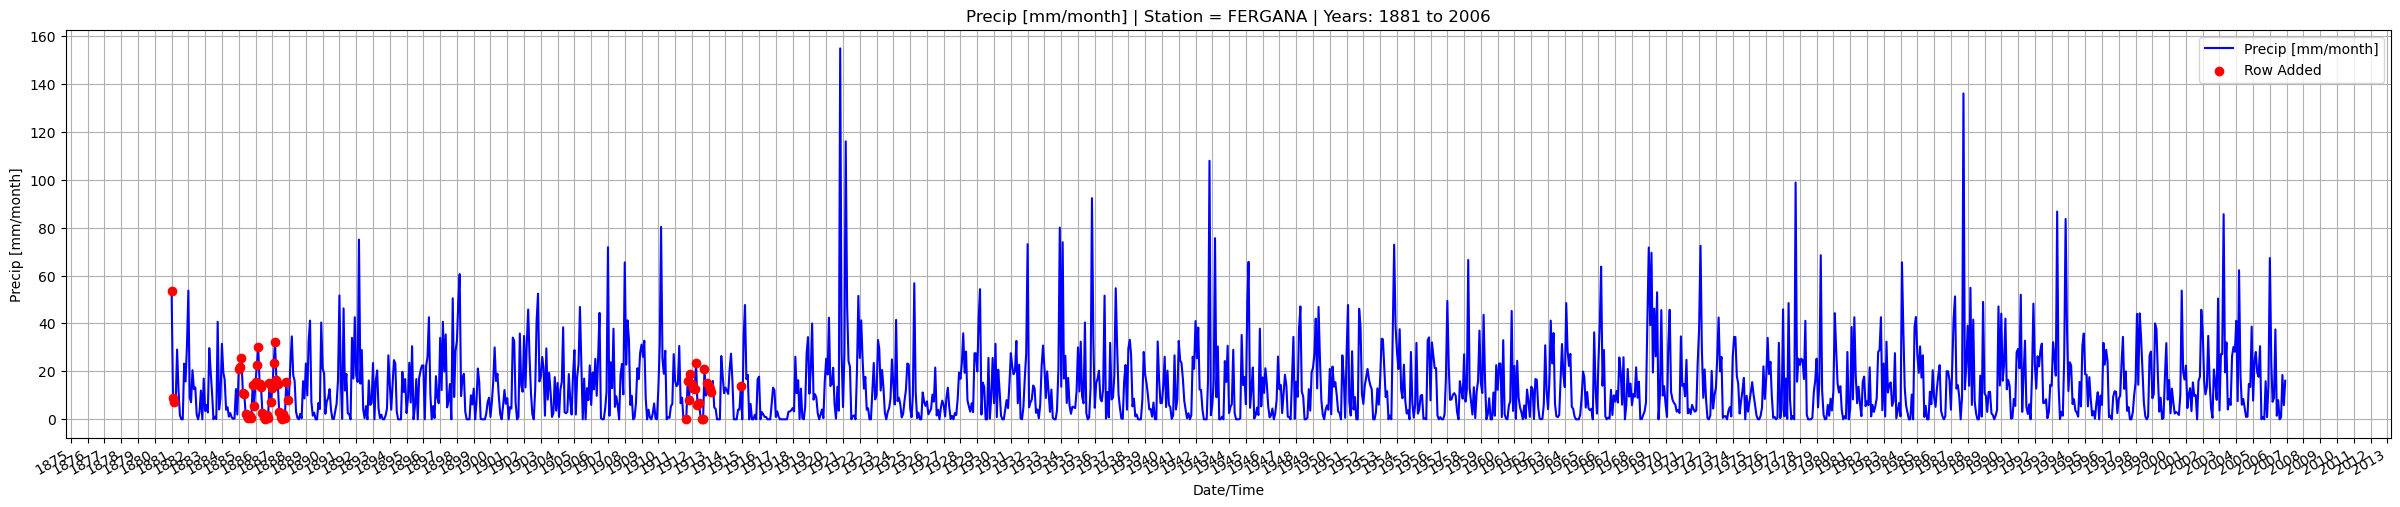

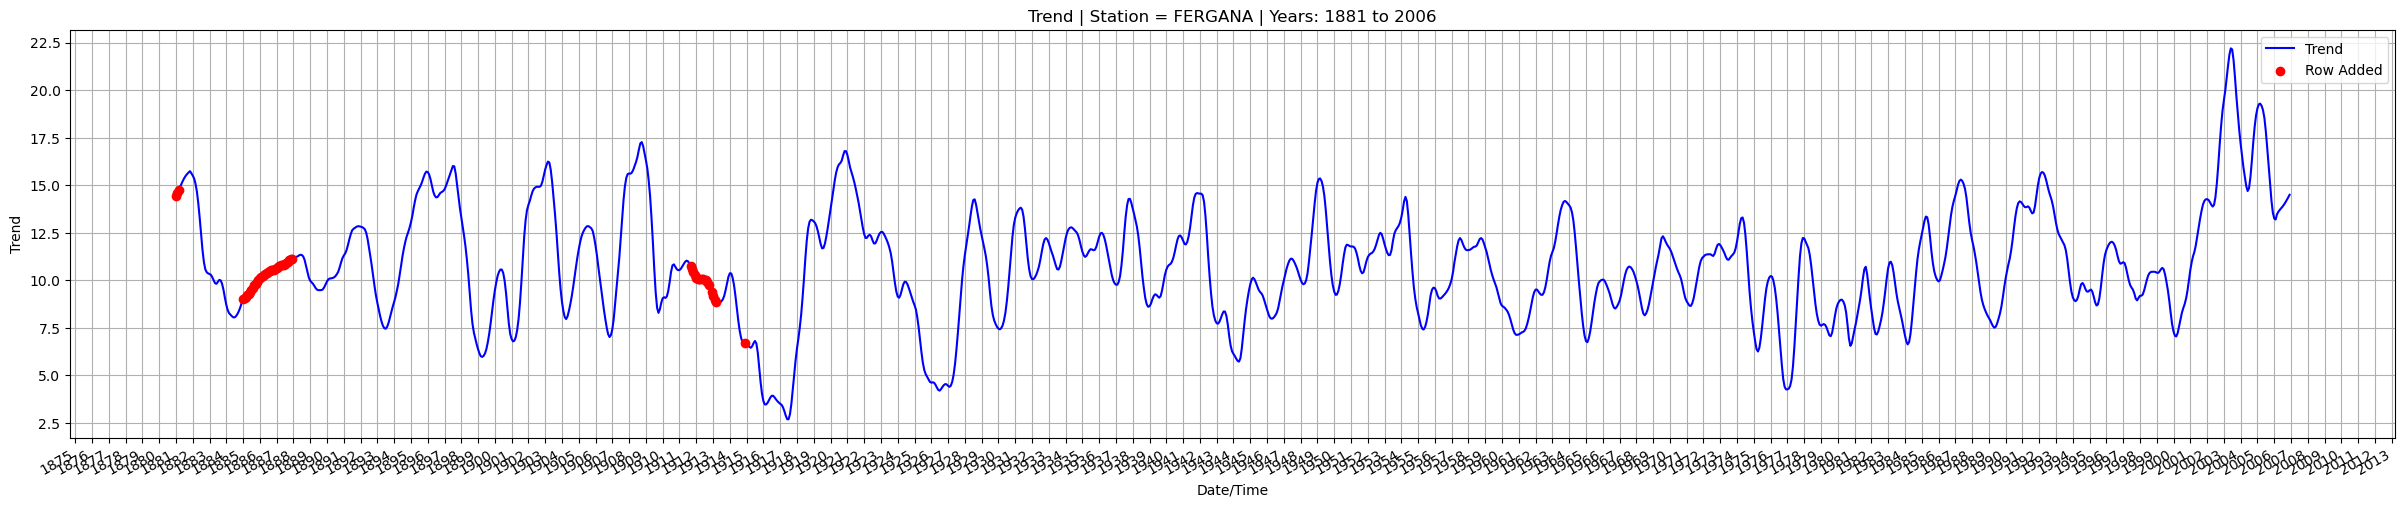

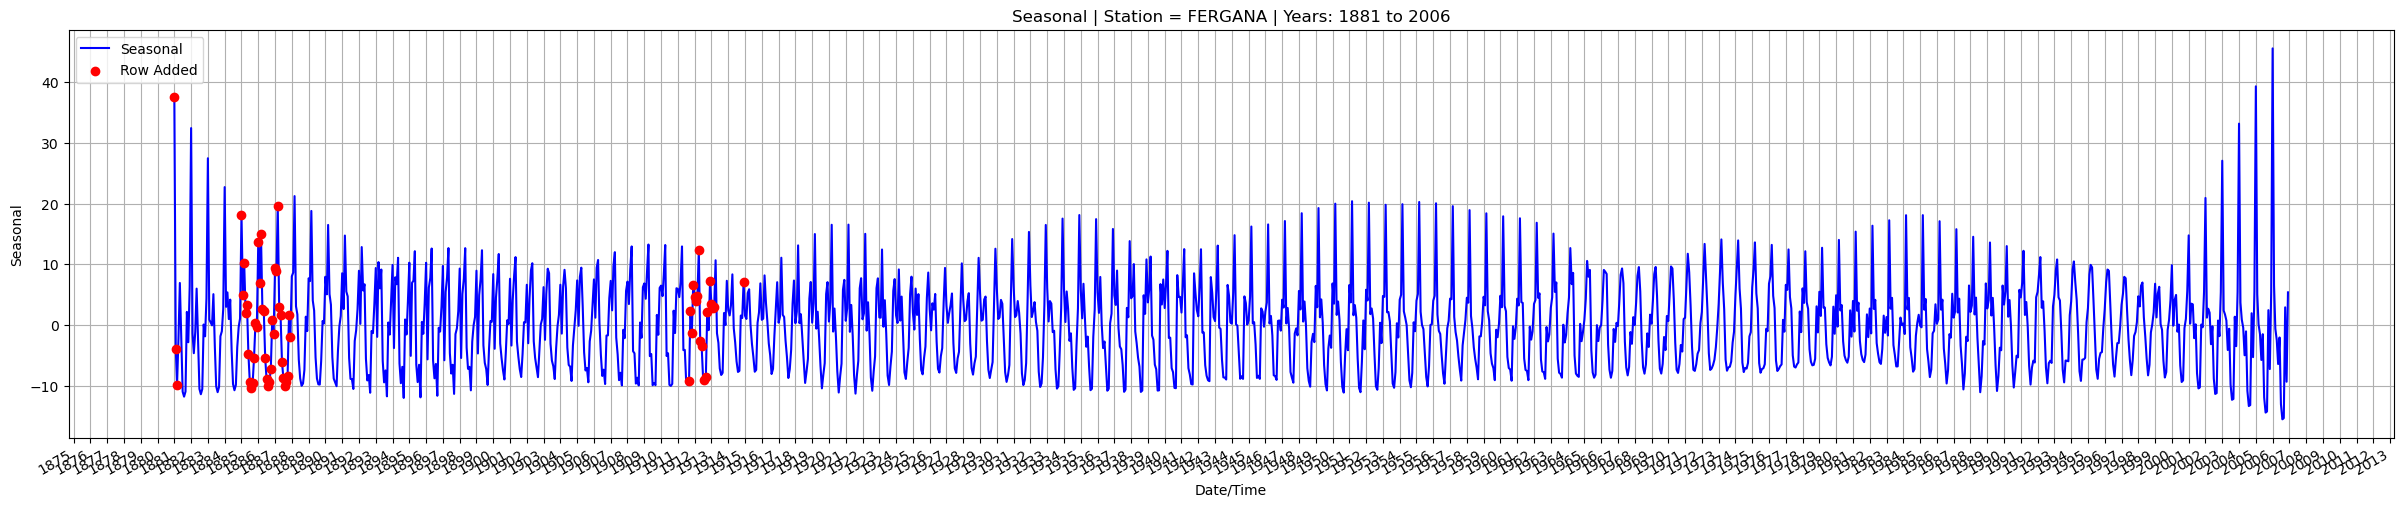

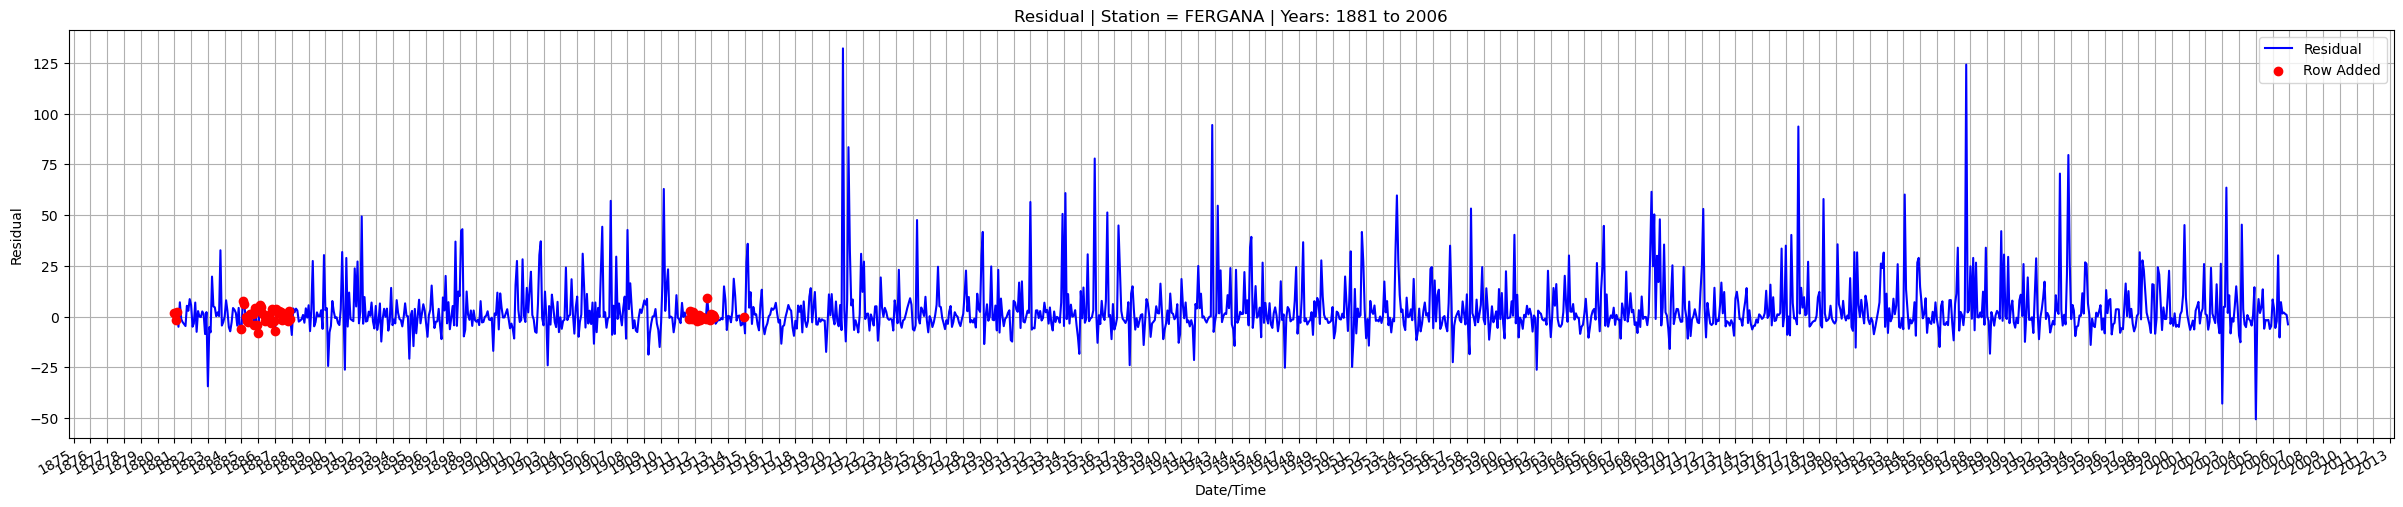

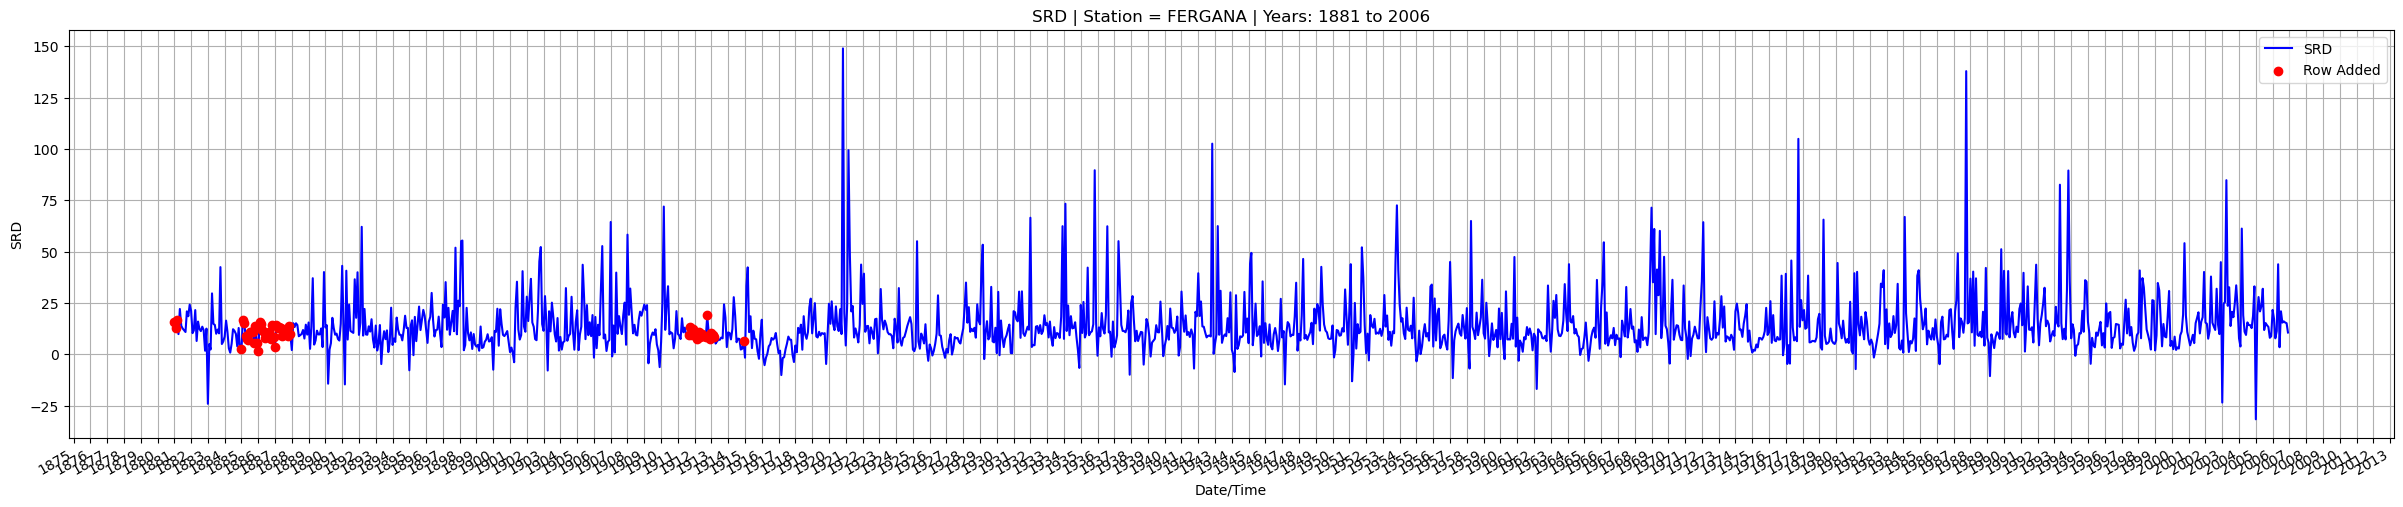

In [621]:
# Plot the original data and the decomposed components
aa = df_RR_STL.copy()
stations = ['FERGANA']
# , 'PONTIANAK', 'BUXTON']
bb = aa[aa['Station'].isin(stations)].copy()
display(bb)

# bb2 = bb[(bb['Station'] == 'Lisbon') & \
#             (bb['Year'] >= 2000) & \
#             (bb['Year'] <= 2017)]


# bb2 =  bb[(bb['Station'] == 'AUBURN')]

plot_Sequence_OneStation(bb, 'Precip [mm/month]')
plot_Sequence_OneStation(bb, 'Trend')
plot_Sequence_OneStation(bb, 'Seasonal')
plot_Sequence_OneStation(bb, 'Residual')
plot_Sequence_OneStation(bb, 'SRD')


## Example: Plot one Station data - Precipitation

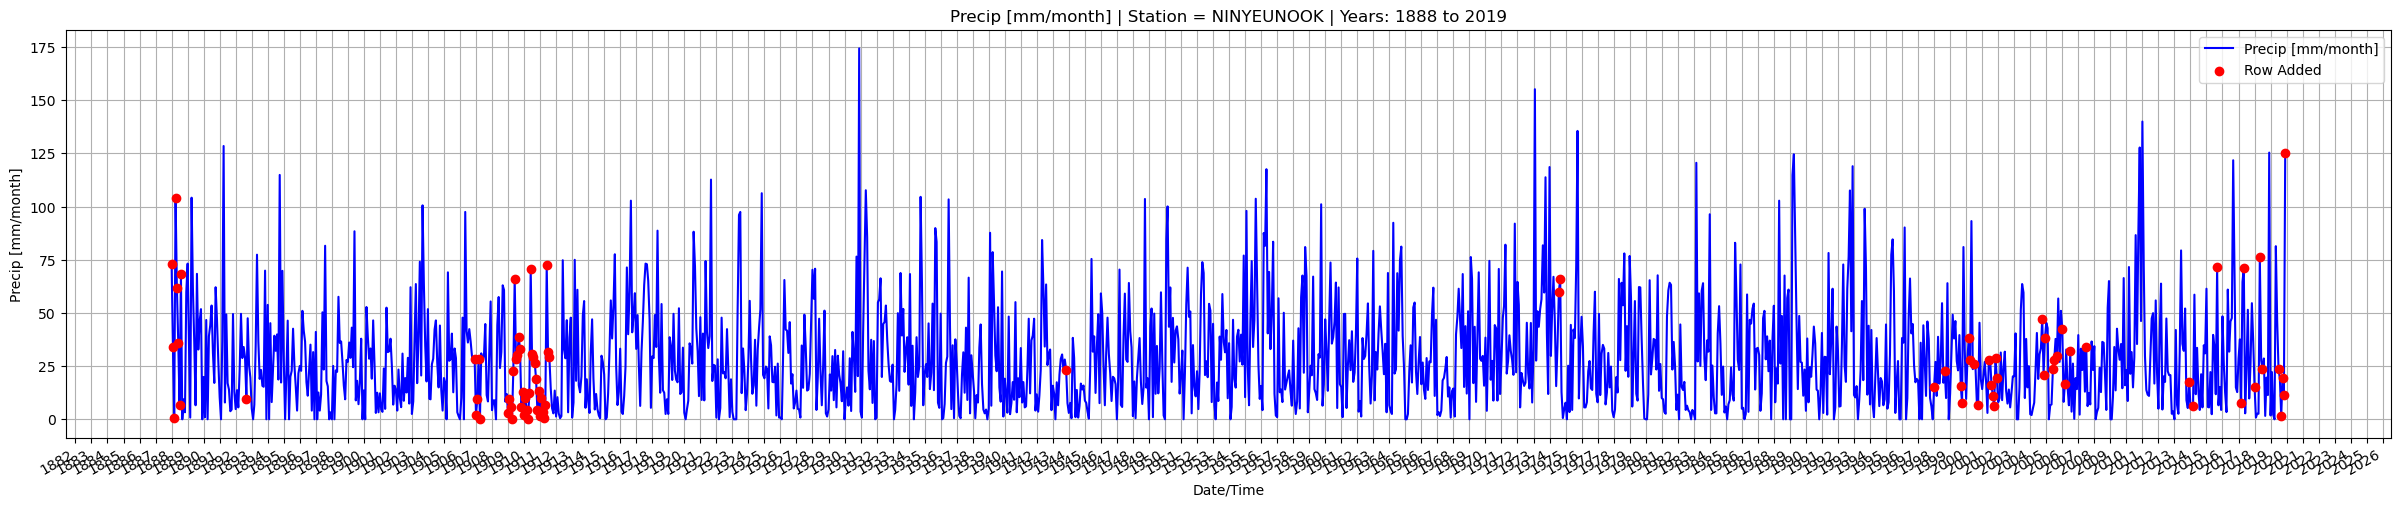

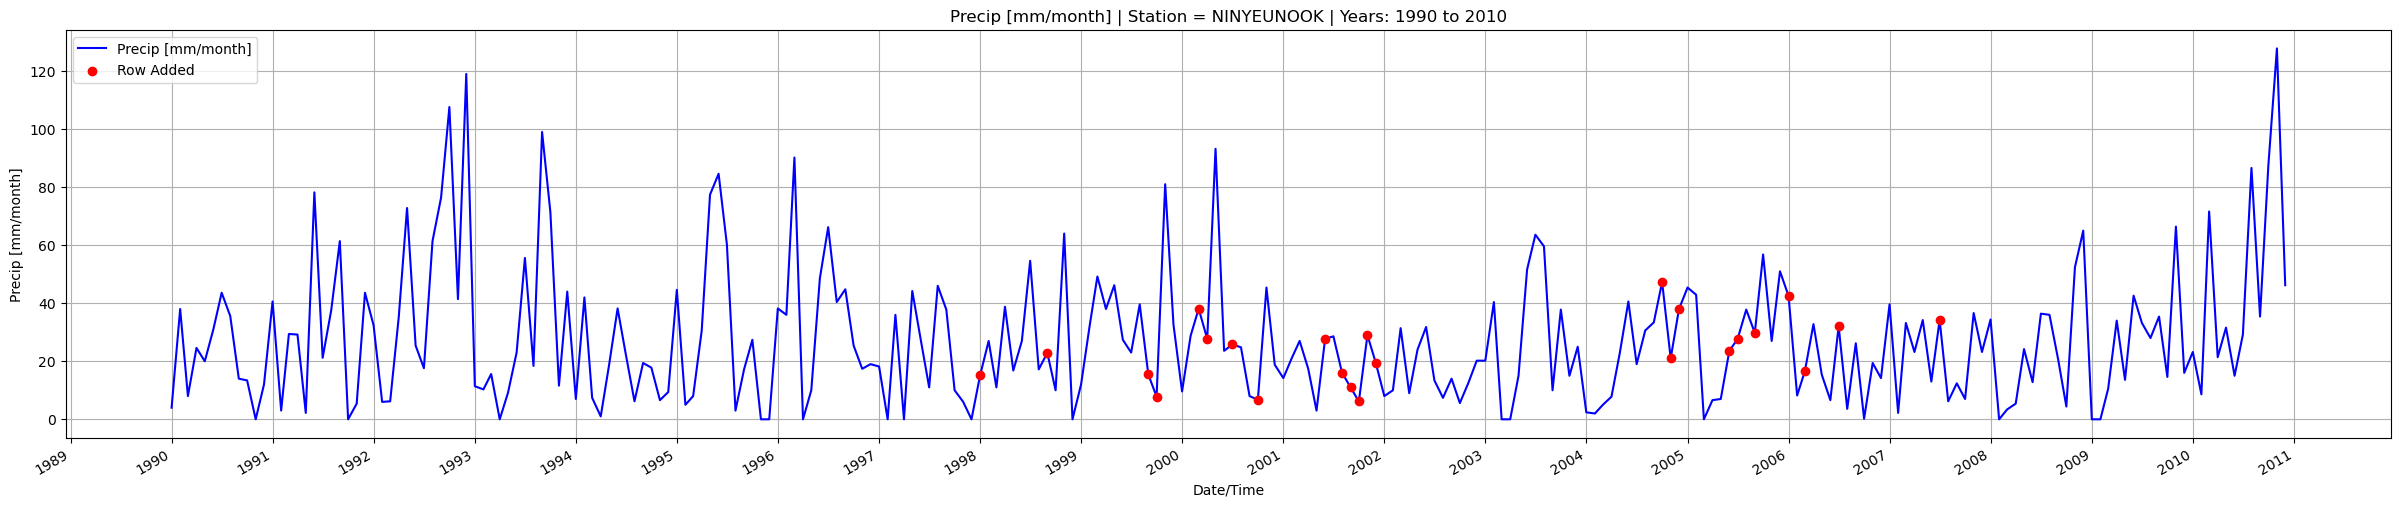

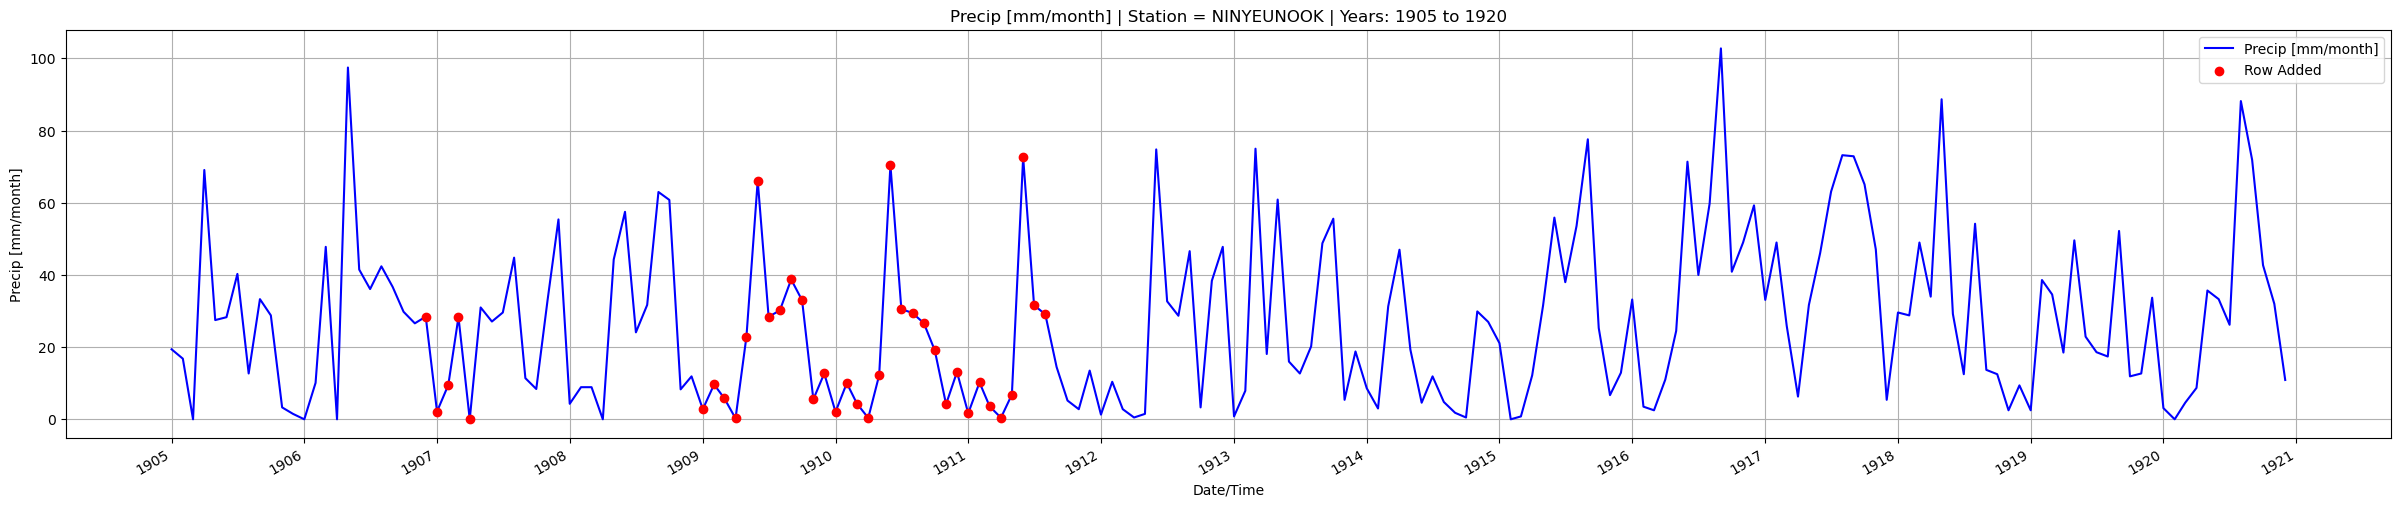

In [622]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_Sequence_OneStation(df, variable):
    
    # Make sure 'Date/Time' is a datetime type
    df.loc[:, 'Date/Time'] = pd.to_datetime(df['Date/Time'])
    
    plt.figure(figsize=(30, 6))
    
    s = df['Station'].iloc[0]
    df_sorted = df.sort_values(by='Year')
    first_year = df_sorted['Year'].iloc[0]
    last_year = df_sorted['Year'].iloc[-1]
    
    plt.title(f"{variable} | Station = {s} | Years: {first_year} to {last_year}")
    plt.xlabel("Date/Time")
    plt.ylabel(variable)
    plt.plot(df['Date/Time'], df[variable], label=f'{variable}', linestyle='-', marker='', color='blue')

    # Highlight rows with 'rowAdded' = 1
    added_data = df[df['rowAdded'] == 1]
    if not added_data.empty:
        plt.scatter(added_data['Date/Time'], added_data[variable], color='red', label='Row Added', zorder=5)

    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate() 

    plt.show()

# printing an example of a particular satation
df_p = df_RR_AddedRows_final[(df_RR_AddedRows_final['Station'] == 'NINYEUNOOK')] 
plot_Sequence_OneStation(df_p, 'Precip [mm/month]')
df_p = df_RR_AddedRows_final[(df_RR_AddedRows_final['Station'] == 'NINYEUNOOK') &
                             (df_RR_AddedRows_final['Year'] >= 1990) & 
                            (df_RR_AddedRows_final['Year'] <= 2010)]
plot_Sequence_OneStation(df_p, 'Precip [mm/month]')
df_p = df_RR_AddedRows_final[(df_RR_AddedRows_final['Station'] == 'NINYEUNOOK') &
                             (df_RR_AddedRows_final['Year'] >= 1905) & 
                            (df_RR_AddedRows_final['Year'] <= 1920)]
plot_Sequence_OneStation(df_p, 'Precip [mm/month]')

